# `Практикум по программированию на языке Python`

## `Задание 01. Полносвязная нейронная сеть на numpy`.

#### Фамилия, имя: Марьясов Максим

Дата выдачи: <span style="color:red">__13 февраля__</span>.

Мягкий дедлайн: <span style="color:red">__28 февраля 05:00__</span>.

Стоимость: __10 баллов__ (основная часть заданий) + __3 балла__ (дополнительные задания).

<span style="color:red">__В ноутбуке все клетки должны выполняться без ошибок при последовательном их выполнении.__</span>

#### `Москва, 2025`

In [ ]:
import numpy as np

np.random.seed(42)

## `Теоретическая часть (3 балла)`

В этом блоке вам нужно решить 3 задания.

### `Задание 1. Градиенты для слоя Batch normalization (1.5 балла)`

Рассмотрим слой Batch normalization. Пусть на вход этого слоя был подан батч из $n$ объектов, при этом у всех объектов по 1 признаку. Представим вход BN слоя в виде $X \in \mathbb{R}^{n \times 1}$.

Тогда в этом слое производятся следующие вычисления:

$$ \mu = \frac1n \sum_{i=1}^{n} X_i $$

$$ \sigma^2 = \frac1n \sum_{i=1}^{n} \left( X_i - \mu \right) ^2 $$

$$ \tilde{y_i} = \frac{X_i - \mu}{\sqrt{\sigma^2 + \varepsilon}} $$

$$ y_i = \gamma \tilde{y_i} + \delta $$

Выходом BN слоя является $y_i$, а $\gamma,\delta\in\mathbb{R}$ — параметры, которые подбираются во время обучения вместе с другими параметрами нейронной сети (наряду, например, с весами линейного слоя).

Рассмотрим нейронную сеть, в которой есть BN слой. Предположим, что вычисления в нейронной сети завершаются подсчетом функции потерь $\mathcal{L}$. Пусть мы выполнили прямой проход по нейронной сети и сейчас делаем обратный проход с помощью метода обратного распространения ошибки. Пусть BN слою пришел градиент функции потерь по выходу BN слоя ($\nabla_{y} \mathcal{L}$).

В этом задании вам нужно записать вычисление градиента функции потерь по параметрам слоя BN $\gamma$ и $\delta$ ($\nabla_{\gamma} \mathcal{L}$, $\nabla_{\delta} \mathcal{L}$) через $\nabla_{y} \mathcal{L}$, а также вам нужно записать вычисление градиента функции потерь по входу слоя BN $X$ ($\nabla_{X} \mathcal{L}$) через $\nabla_{y} \mathcal{L}$.

Хочу заметить, в данном задании мы рассматриваем объекты всего с 1 признаком, чтобы упростить выкладки.

__Ваше решение:__
Пусть $U = (1 ... 1)^T, X = (x_1 ... x_n)^T$, где $U, X \in ℝ^{n \times 1} $.
$$\mu = \frac{1}{n} U^T X, \\ \sigma^2 = \frac{1}{n}||X-\mu U||^2 \\ \tilde{y} = \frac{1}{\sqrt{\sigma^2 + ϵ}} (X - \mu U) \\ y = \gamma \tilde{y} + δ U$$

Распишем дифференциал y: \\
$$dy = d\gamma \cdot y + \gamma \cdot d\tilde{y} + d\delta \cdot U$$

Распишем дифференциал $L$ (лосса): \\
$$dL = \langle ∇_y L, dy \rangle = \langle ∇_y L, d\gamma \cdot y \rangle + \langle ∇_yL, \gamma \cdot d\tilde{y} \rangle + \langle \nabla_yL, d\delta \cdot U \rangle = (\nabla_yL)^T y \cdot d\gamma + \gamma \langle \nabla_yL, d\tilde{y} \rangle + (\nabla_yL)^T U \cdot d\delta $$

Следовательно: \\
$$\nabla_{\gamma}L = (\nabla_yL)^Ty, \nabla_{\delta}L = (\nabla_yL)^TU, \nabla_{\tilde{y}}L = \gamma \cdot \nabla_yL$$

Сделаем следующую замену: $$M = X - \mu U = X - \frac{1}{n} U^TXU$$

Тогда получаем следующее: \\
$$\tilde{y} = \frac{1}{ \sqrt{ \frac{1}{n}||M||^2 + ϵ}}M$$

$$d\tilde{y} = \frac{1}{(\frac{1}{n} ||M||^2 + ϵ)^{1/2}} \left(I_n - \frac{1}{(\frac{1}{n} ||M||^2 + ϵ)^{3/2}} \cdot MM^T \right) dM$$

Распишем теперь $L$ по другому: \\
$$dL = \langle \nabla{\tilde{y}}L, d\tilde{y} ⟩ = ⟨\nabla_M L, dM ⟩ ⇒ \nabla_ML = \frac{1}{(\frac{1}{n} ||M||^2 + ϵ)^{1/2}} \left(I_n - \frac{1}{(\frac{1}{n} ||M||^2 + ϵ)^{3/2}} \cdot MM^T \right) \nabla_y L$$

Далее рассмотрим следующее: \\
$$dM = dX - \frac{1}{n}U^TdXU ⇒ \nabla_XL = (I - \frac{1}{n}UU^T)\nabla_ML = (I - \frac{1}{n}UU^T) \frac{1}{(\frac{1}{n} ||M||^2 + ϵ)^{1/2}} \left(I_n - \frac{1}{(\frac{1}{n} ||M||^2 + ϵ)^{3/2}} \cdot MM^T \right) \nabla_y L $$

Теперь упростим выражение. Заметим, что $U^TU = n$. Таким образом получаются следующие равенства: \\
$$||M||^2 = X^TX - \frac{1}{n}(U^TX)^2 = \sum_{i=1}^n (x_i)^2 - \left(\sum_{i=1}^n x_i \right)^2$$

$$MM^T = XX^T + \frac{1}{n^2}(U^TX)^2 UU^T - \frac{1}{n}(U^TX)(UX^T + XU^T)$$

Подставляем и получаем итоговый ответ.

### `Задание 2. Вывод инициализации весов линейного слоя при использовании ReLU в качестве функции активации (1 балл)`

Рассмотрим полносвязную нейронную сеть с функцией активации $g(y)$. Пусть сеть состоит из $L$ слоев и размер входа слоя $l$ равен $n_l\ \ (l = \overline{1, L})$.

Обозначим за $x^l \in \mathbb{R}^{n_{l}}$ вход слоя $l$, за $y^l \in \mathbb{R}^{n_{l+1}}$ — выход слоя $l$, за $W^l \in \mathbb{R}^{n_{l+1} \times n_{l}}$ — веса слоя $l$, за $b^l \in \mathbb{R}^{n_{l+1}}$ — вектор сдвига слоя $l$.

Тогда
$$y^l = W^l x^l + b^l,$$
$$x^{l+1} = g(y^l).$$

На паре вы выводили хорошую инициализацию для линейного слоя в случае, когда в качестве функции активации $g(y)$ в нейронной сети используется гиперболический тангенс $g(y) = \tanh(y)$. Сейчас вам нужно сделать подобный вывод для случая, когда в сети в качестве функций активации используется $g(y) = ReLU(y) = \max(0, y)$.

Сделаем следующие предположения насчет того, как распределены веса $W^l$, вектор сдвига $b^l$, входной вектор $x^l$, выходной вектор $y^l$ линейного слоя и градиенты функции потерь $\frac{\partial L}{\partial y^{l}}$ $(l = \overline{1, L}$):

1. Все компоненты в $W^l$ распределены одинаково и независимо друг от друга;
2. Все компоненты в $y^l$ распределены одинаково и независимо друг от друга;
3. Все компоненты в $x^l$ распределены одинаково и независимо друг от друга;
4. Все компоненты в $\frac{\partial L}{\partial y^{l}}$ распределены одинаково и независимо друг от друга;
5. Все компоненты в $W^l$ и все компоненты в $x^l$ независимы друг от друга;
6. Все компоненты в $W^l$ имеют четную плотность распределения (то есть симметричную относительно нуля: $p_{W^l}(-x) = p_{W^l}(x)$);
7. Все компоненты в $W^l$ имеют конечное матожидание;
8. Вектор $b^l$ инициализирован нулями.


Подсказки:
1. Из пунктов 6 и 7 следует, что все компоненты в $W^l$ имеют нулевое среднее ($\mathbb{E} W^l_{ij} = 0\ \ \forall i = \overline{1, n_{l+1}}, j = \overline{1, n_{l}}$) (докажите);
2. Из пунктов 6 и 7 следует, что все компоненты в $y^l$ имеют нулевое среднее и четную плотность распределения (докажите).

__Ваше решение:__

...

### `Задание 3. Почему функция активации` $ReLU(y) = \max(0, y)$ `предпочтительней сигмоиды` $\sigma(y) = \frac{1}{1 + \exp(-y)}$ `в нейронных сетях? (0.5 балла)`

Дайте развернутый ответ на вопрос "Почему функция активации $ReLU(y) = \max(0, y)$ предпочтительней сигмоиды $\sigma(y) = \frac{1}{1 + \exp(-y)}$ в нейронных сетях?"

__Ваш ответ:__
1. При использовании функции активации ReLU **решается проблема затухания градиента**, которая присутствует при использовании сигмоиде. Она заключается в том, что до начальных слоев не доходит поток градиента, и он стремится там к нулю.
(Из-за того, что $\frac{\partial σ} {∂y} = σ(y) (1 - σ(y)) \in (0, 1) $, в отличии от ReLU, у которой производная равная либо единицы, либо нулю).

2. Функцию активации ReLU **намного проще вычисляется** относительно вычисления экспонент, которые требуется подсчитать для сигмоиды.

3. **Сигмоида теряет информацию при переходе между слоями**, так как переводит в диапазон значений  $(0, 1)$ и не сохраняет тренд признаков, в отличие от ReLU, которая лишь обнуляет отрицательные значения, сохраняя тренды положительных значений.

---

## `Практическая часть (7 баллов)`

### `Реализация нейронной сети (3 балла)`

В этом задании вы обучите полносвязную нейронную сеть распознавать рукописные цифры (а что же еще, если не их :), [почти] самостоятельно реализовав все составляющие алгоритма обучения и предсказания.

Для начала нам понадобится реализовать прямой и обратный проход через слои. Наши слои будут соответствовать следующему интерфейсу (на примере "тождественного" слоя):

In [ ]:
class IdentityLayer:
    """
    A building block. Each layer is capable of performing two things:

    - Process input to get output:
    output = layer.forward(input)

    - Propagate gradients through itself:
    grad_input = layer.backward(input, grad_output)

    Some layers also have learnable parameters.

    Modified code from cs.hse DL course *
    """
    def __init__(self):
        """
        Here you can initialize layer parameters (if any)
        and auxiliary stuff. You should enumerate all parameters
        in self.params
        """
        # An identity layer does nothing
        self.params = []
        pass

    def forward(self, input):
        """
        Takes input data of shape [batch, input_units],
        returns output data [batch, output_units]
        """
        # An identity layer just returns whatever it gets as input.
        self.input = input
        return input

    def backward(self, grad_output):
        """
        Performs a backpropagation step through the layer,
        with respect to the given input.

        To compute loss gradients w.r.t input,
        you need to apply chain rule (backprop):

        d `loss` / d `input` = (d `loss` / d `layer`) * (d `layer` / d `input`)

        Luckily, you already receive d `loss` / d `layer` in argument,
        so you only need to multiply it by d `layer` / d `input`.

        NB: Sometimes d `layer` / d `input` can be a 3D or even 4D tensor.
        So it's better to write down the `loss` differential and extract
        d `layer` / d `input` from it so that only 2D tensors were present.

        The method returns:
        * gradient w.r.t input (will be passed to
          previous layer's backward method)
        * flattened gradient w.r.t. parameters (with .ravel()
          applied to each gradient).
          If there are no params, return []
        """
        # The gradient of an identity layer is precisely grad_output
        input_dim = self.input.shape[1]

        d_layer_d_input = np.eye(input_dim)

        return np.dot(grad_output, d_layer_d_input), [] # chain rule

#### `Слой нелинейности ReLU`

Для начала реализуем слой нелинейности $ReLU(y) = \max(0, y)$. Параметров у слоя нет. Метод `forward` должен вернуть результат поэлементного применения $ReLU$ к входному массиву, метод `backward` — градиент функции потерь по входу слоя. В нуле будем считать производную равной 0. Обратите внимание, что при обратном проходе могут понадобиться величины, посчитанные во время прямого прохода, поэтому их стоит сохранить как атрибут класса.

In [ ]:
class ReLU:
    """
    Modified code from cs.hse DL course *
    """
    def __init__(self):
        """ReLU layer simply applies elementwise rectified linear unit to all inputs"""
        self.params = [] # ReLU has no parameters

    def forward(self, input):
        """Apply elementwise ReLU to [batch, num_units] matrix"""
        self.input = input
        return np.maximum(0, input)

    def backward(self, grad_output):
        """Compute gradient of loss w.r.t. ReLU input
        grad_output shape: [batch, num_units]
        output 1 shape: [batch, num_units]
        output 2: []
        """
        mask = self.input <= 0
        grad_output[mask] = 0
        return grad_output, []

    def __repr__(self):
        return 'Relu()'

#### `Полносвязный слой`

Далее реализуем полносвязный слой без нелинейности. У слоя два параметра: матрица весов и вектор сдвига.

Обратите внимание на второй аргумент: в нем надо возвращать градиент по всем параметрам в одномерном виде. Для этого надо сначала применить `.ravel()` ко всем градиентам, а затем воспользоваться `np.r_`:

In [ ]:
# example
np.r_[np.eye(3).ravel(), np.arange(4)]

array([1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 2., 3.])

In [ ]:
class Dense:
    """
    Modified code from cs.hse DL course *
    """
    def __init__(self, input_units, output_units):
        """
        A dense layer is a layer which performs a learned affine transformation:
        f(x) = x W + b
        """
        # initialize weights with small random numbers from normal distribution
        self.weights = np.random.randn(input_units, output_units) * 0.01
        self.biases = np.zeros(output_units)
        self.params = [self.weights, self.biases]

    def forward(self,input):
        """
        Perform an affine transformation:
        f(x) = x W + b

        input shape: [batch, input_units]
        output shape: [batch, output units]
        """
        self.input = input
        return np.dot(input, self.weights) + self.biases

    def backward(self, grad_output):
        """
        compute gradients
        grad_output shape: [batch, output_units]
        output shapes: [batch, input_units], [num_params]

        hint: use function np.r_
        np.r_[np.arange(3), np.arange(3)] = [0, 1, 2, 0, 1, 2]
        """
        grad_weights = np.dot(self.input.T, grad_output).ravel()
        grad_biases = np.sum(grad_output, axis=0)
        return np.dot(grad_output, self.weights.T), np.r_[grad_weights, grad_biases]

    def __repr__(self):
        return f'Dense({self.weights.shape[0]}, {self.weights.shape[1]})'

#### `Проверка градиента`

Проверим правильность реализации с помощью функции численной проверки градиента. Функция `eval_numerical_gradient` принимает на вход callable объект `f` (функцию от одного аргумента-матрицы) и аргумент `x` и вычисляет приближенный градиент функции `f` в точке `x`.

In [ ]:
def eval_numerical_gradient(f, x, verbose=False, h=0.00001):
    """
    Evaluates gradient df/dx via finite differences:
    df/dx ~ (f(x+h) - f(x-h)) / 2h
    Adopted from https://github.com/ddtm/dl-course/
    """
    fx = f(x) # evaluate function value at original point
    grad = np.zeros_like(x)
    # iterate over all indexes in x
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:

        # evaluate function at x+h
        ix = it.multi_index
        oldval = x[ix]
        x[ix] = oldval + h # increment by h
        fxph = f(x) # evalute f(x + h)
        x[ix] = oldval - h
        fxmh = f(x) # evaluate f(x - h)
        x[ix] = oldval # restore

        # compute the partial derivative with centered formula
        grad[ix] = (fxph - fxmh) / (2 * h) # the slope
        if verbose:
            print (ix, grad[ix])
        it.iternext() # step to next dimension

    return grad

Вычислите аналитический и численный градиенты по входу слоя ReLU от функции
$$ f(y) = \sum_i y_i, \quad y = ReLU(x) $$

Выпишите аналитический градиент в этой ячейке:

Пусть $ y \in ℝ^{m \times n}$, тогда
$$ \frac{\partial f}{\partial y} = I_{m \times n}, \frac{\partial y}{\partial x} = {[I(y_{ij}) > 0]}_{i=1,... m, j=1,... n}$$


Следующая ячейка после заполнения должна не выдавать ошибку :)

In [ ]:
relu = ReLU()
points = np.linspace(-1, 1, 10*12).reshape([10, 12])

def f(x):
  return np.sum(np.maximum(0, x))

relu.forward(points)
grads = relu.backward(np.ones((10, 12)))[0]
numeric_grads = eval_numerical_gradient(f, points)

assert np.allclose(grads, numeric_grads, rtol=1e-3, atol=0)

Вычислите аналитический и численный градиенты по входу полносвязного слоя от функции
$$ f(y) = \sum_i y_i, \quad y = W x + b $$

Выпишите аналитический градиент в этой ячейке (советуем выписать градиент через дифференциал функции $f$):

Пусть $x \in  ℝ^{int}, y, b \in ℝ^{out}, W \in ℝ^{out \times int}$ тогда
$$ \frac{\partial f}{\partial y} = I_{out}, \frac{\partial y}{\partial x} = W^T => \frac{\partial f}{\partial x} = W^T I_{out} $$


Следующая ячейка после заполнения должна не выдавать ошибку :)

In [ ]:
linear = Dense(12, 32)
points = np.linspace(-1, 1, 10*12).reshape([10, 12])

linear.forward(points)

def f(x):
  return np.sum(np.dot(x, linear.weights) + linear.biases)

grads = linear.backward(np.ones((10, 32)))[0]
numeric_grads = eval_numerical_gradient(f, points)

assert np.allclose(grads, numeric_grads, rtol=1e-3, atol=0)

#### `Реализация softmax-слоя и функции потерь`

Для решения задачи многоклассовой классификации обычно используют $softmax$ в качестве нелинейности на последнем слое, чтобы получить вероятности классов для каждого объекта:
$$\hat y = softmax(x)  = \left \{\frac {\exp(x^i)}{\sum_{j=1}^K \exp(x^j)} \right \}_{i=1}^K, \quad K - \text{число классов.}$$

Здесь за $x^i$ мы обозначаем $i$-ый признак объекта $x$.

В качестве функции потерь выберем отрицательный логарифм правдоподобия (по английски: negative log likelihood или NLL)
$$L(y, \hat y) = -\sum_{i=1}^K y^i \log \hat y^i,$$
где $y^i = 1$, если объект принадлежит $i$-му классу, и $y^i = 0$ иначе.

NLL совпадает с выражением для [кросс-энтропии](https://ru.wikipedia.org/wiki/Перекрёстная_энтропия) (в качестве первого распределения берем вырожденное распределение $y$, в качестве второго — предсказанное распределение $\hat y$). Очевидно, что эту функцию потерь также можно переписать через индексацию, если через $y$ обозначить класс данного объекта:
$$L(y, \hat y) = - \log \hat y_{y}$$

В таком виде ее удобно реализовывать.

Для обучения нейронной сети будем оптимизировать эту функцию потерь по параметрам нейронной сети:

$$ \frac1N \sum_{i=1}^N L(y_i, \hat y_i) = \frac1N \sum_{i=1}^N L(y_i, \text{NN}(x_i)) \rightarrow \min_{w}\,,$$
где за $x_i$ и $y_i$ мы обозначили признаки и таргет $i$-ого объекта обучающей выборки, за $\text{NN}$ мы обозначили нейронную сеть, которая по признакам объекта $x_i$ выдает распределение вероятностей $\hat y_i$, за $w$ мы обозначили все веса нейронной сети, а $N$ — это число объектов в обучающей выборке.

Реализуйте слой `LogSoftmax` (у этого слоя нет параметров). Метод `forward` должен вычислять логарифм от $softmax$, а метод `backward` — пропускать градиенты. В общем случае в промежуточных вычислениях `backward` получится трехмерный тензор, однако для нашей конкретной функции потерь все вычисления можно реализовать в матричном виде.  Поэтому мы будем предполагать, что аргумент `grad_output` — это матрица, у которой в каждой строке только одно ненулевое значение (не обязательно единица).

**Пожелание.** Постарайтесь максимально упростить формулу градиентов, чтобы получился лаконичный и стабильный код. Большие и страшные реализации часто оказываются нестабильными.

In [ ]:
from scipy.special import logsumexp
# use this function instead of np.log(np.sum(np.exp(...))) because it is more stable

In [ ]:
class LogSoftmax:
    def __init__(self):
        self.params = []

    def forward(self, input):
        """
        Applies softmax to each row and then applies component-wise log
        Input shape: [batch, num_units]
        Output shape: [batch, num_units]
        """
        self.input = input
        self.logsf = input - logsumexp(input, axis=1, keepdims=True)
        return self.logsf

    def backward(self, grad_output):
        """
        Propagartes gradients.
        Assumes that each row of grad_output contains only 1
        non-zero element
        Input shape: [batch, num_units]
        Output shape: [batch, num_units]
        Do not forget to return [] as second value (grad w.r.t. params)
        """

        return grad_output - np.sum(grad_output, axis=1, keepdims=True) * np.exp(self.logsf), []

    def __repr__(self):
        return 'LogSoftmax()'

Реализуйте функцию потерь и градиенты функции потерь. Во время вычисления NLL усредняйте (а не суммируйте) значения функции потерь по батчу. Обычно так делают для того, чтобы при двух запусках обучения нейронной сети с разными размерами батча получаемые значения функции потерь у этих сетей были сравнимы.

In [ ]:
def NLL(activations, target):
    """
    Returns negative log-likelihood of target under model represented by
    activations (log probabilities of classes, it's just output of LogSoftmax layer).
    `activations` has shape [batch, num_classes], `target` has shape [batch]
    Output shape: 1 (scalar).
    """
    batch_size = target.shape[0]
    return - np.mean(activations[np.arange(batch_size), target])


def grad_NLL(activations, target):
    """
    Returns gradient of negative log-likelihood w.r.t. activations.
    each arg has shape [batch, num_classes]
    output shape: [batch, num-classes]
    """
    batch_size = target.shape[0]
    I = np.zeros_like(activations)
    I[np.arange(batch_size), target] = 1
    return - I/batch_size

Наконец, выполните проверку `LogSoftmax`-слоя, используя функцию потерь и ее градиент:

In [ ]:
n = 50
d = 10
lsm = LogSoftmax()
target = np.random.choice(d, size=n)
points = np.random.uniform(-1, 1, n*d).reshape([n, d])

activations = lsm.forward(points)

num_grad_NLL = eval_numerical_gradient(lambda x: NLL(x, target), activations)

grads = lsm.backward(grad_NLL(activations, target))[0]
numeric_grads = lsm.backward(num_grad_NLL)[0]

assert np.allclose(grads, numeric_grads, rtol=1e-3, atol=0)

def f(X):
  return np.sum(lsm.forward(X))

grads = lsm.backward(np.ones((50, 10)))[0]
numeric_grads = eval_numerical_gradient(f, points)

assert np.allclose(grads, numeric_grads, rtol=1e-3, atol=0)

### `Загрузка данных`

Мы реализаовали все архитектурные составляющие нашей нейронной сети. Осталось загрузить данные и обучить модель. Мы будем работать с датасетом `digits`, каждый объект в котором — это 8x8 изображение рукописной цифры.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.datasets import load_digits

In [ ]:
X, y = load_digits(return_X_y=True)

In [ ]:
X.shape, y.shape

((1797, 64), (1797,))

Разделим данные на обучение и контроль:

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
X_train.shape, X_test.shape

((1347, 64), (450, 64))

### `Сборка и обучение нейронной сети (0.8 балла)`

В нашей реализации мы представляем нейронную сеть в виде списка ее слоев. Например, следующая функция конструирует нейронную сеть заданной ширины (то есть с заданным размером скрытых слоев) и глубины (то есть с заданным количеством слоев) с заданным размером входа и выхода, а также с заданной функцией активации между линейными слоями.

In [ ]:
def make_network(input_size, hidden_layers_size, output_size, n_layers=3, activation_class=ReLU):
    network = []

    for layer_idx in range(n_layers):
        # Compute sizes of current linear layer
        layer_in = input_size if layer_idx == 0 else hidden_layers_size
        layer_out = output_size if layer_idx == n_layers - 1 else hidden_layers_size

        # Add linear layer to the network
        network.append(Dense(layer_in, layer_out))

        # Add activation after each layer except the last one
        if layer_idx != n_layers - 1:
            network.append(activation_class())

    # Add LogSoftmax layer to the network
    network.append(LogSoftmax())

    return network

In [ ]:
input_size = X_train.shape[1]
hidden_layers_size = 32
output_size = 10

network = make_network(input_size, hidden_layers_size, output_size, 3, ReLU)
network

[Dense(64, 32), Relu(), Dense(32, 32), Relu(), Dense(32, 10), LogSoftmax()]

Реализуйте функцию, которая выполнет прямой проход по нейронной сети:

In [ ]:
def forward(network, X):
    """
    Perform forward pass through the network.

    network: list of layers
    X: raw data
    X shape: [batch, features_num]

    output:
    output shape: [batch, out_features_num]
    """
    input = X
    for layer in network:
        output = layer.forward(input)
        input = output
    return output


Для проверки, хорошо ли сеть обучилась, нам понадобится вычислять долю правильных ответов (accuracy) на данной выборке. Для этого реализуйте функцию, которая делает предсказания на каждом объекте (логично в качестве предсказания на очередном объекте выдавать тот класс, для которого предсказанный логарифм вероятности максимален):

In [ ]:
def predict(network, X):
    """
    Returns predictions for each object in X.

    network: list of layers
    X: raw data
    X shape: [batch, features_num]

    output: array of classes, each from 0 to 9
    output shape: [batch]
    """
    logsoftmax_batch = forward(network, X)
    return np.argmax(logsoftmax_batch, axis=1)

Мы будем обучать параметры нейросети с помощью готовой функции оптимизации из модуля `scipy`:

In [ ]:
from scipy.optimize import minimize

In [ ]:
help(minimize)

Help on function minimize in module scipy.optimize._minimize:

minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
    Minimization of scalar function of one or more variables.
    
    Parameters
    ----------
    fun : callable
        The objective function to be minimized.
    
            ``fun(x, *args) -> float``
    
        where ``x`` is a 1-D array with shape (n,) and ``args``
        is a tuple of the fixed parameters needed to completely
        specify the function.
    x0 : ndarray, shape (n,)
        Initial guess. Array of real elements of size (n,),
        where ``n`` is the number of independent variables.
    args : tuple, optional
        Extra arguments passed to the objective function and its
        derivatives (`fun`, `jac` and `hess` functions).
    method : str or callable, optional
        Type of solver.  Should be one of
    
            - 'Nelder-Mead' :ref:`(see he

Эта функция имеет стандартный интерфейс: нужно передать callable объект, который вычисляет значение и градиент целевой функции, а также точку старта оптимизации — начальное приближение (одномерный `numpy`-массив). Поэтому нам понадобятся функции для сбора и задания всех весов нашей нейросети (именно для них мы всегда записывали параметры слоя в список `layer.params`)

In [ ]:
def get_weights(network):
    weights = []
    for layer in network:
        for param in layer.params:
            weights += param.ravel().tolist()
    return np.array(weights)


def set_weights(weights, network):
    i = 0
    for layer in network:
        for param in layer.params:
            l = param.size
            param[:] = weights[i:i+l].reshape(param.shape)
            i += l

Вам нужно реализовать ту самую функцию, которую мы будем передавать в `minimize`. Эта функция должна брать на вход текущую точку (вектор всех параметров), а также список дополнительных параметров (мы будем передавать через них нашу сеть и обучающие данные) и возвращать значение критерия качества (NLL) и его градиент по параметрам модели.

In [ ]:
def compute_loss_grad(weights, args):
    """
    takes current weights and computes cross-entropy and gradients
    weights shape: [num_parameters]
    output 1: loss (scalar)
    output 2: gradint w.r.t. weights, shape: [num_parameters]

    hint: firstly perform forward pass through the whole network
    then compute loss and its gradients
    then perform backward pass, transmitting first baskward output
    to the previos layer and saving second baskward output in a list
    finally flatten all the gradients in this list
    (in the order from the first to the last layer)

    Do not forget to set weights of the network!
    """
    network, X, y = args

    set_weights(weights, network)

    # forward pass of network
    activations = forward(network, X)

    # computing loss
    loss = NLL(activations, y)

    # backward pass of network
    grad_output = grad_NLL(activations, y)
    grad_array = []

    for layer in reversed(network):
      grad_input, grad_params = layer.backward(grad_output)
      grad_output = grad_input

      if len(grad_params) > 0:
        grad_array.append(grad_params)

    grad_array = grad_array[::-1]
    grad_array = np.concatenate(grad_array)

    # compute array of grad weights
    return loss, grad_array

Теперь мы готовы обучать нашу нейросеть.

In [ ]:
weights = get_weights(network)

In [ ]:
res = minimize(
    compute_loss_grad, weights,       # fun and start point
    args=[network, X_train, y_train], # args passed to fun
    method="L-BFGS-B",                # optimization method
    jac=True                          # says that gradient is computed in fun
)

In [ ]:
res.keys()

dict_keys(['fun', 'jac', 'nfev', 'njev', 'nit', 'status', 'message', 'x', 'success', 'hess_inv'])

In [ ]:
res["nit"] # number of iterations (should be >> 10)

151

In [ ]:
res["success"] # should be True

True

In [ ]:
res["x"] # leraned weights

array([-0.01042485,  0.01277927, -0.00261027, ..., -1.03834359,
       -2.51712321, -0.54536867])

Выведите качество на обучении (`X_train`, `y_train`) и на контроле (`X_test`, `y_test`). Не забудьте установить веса!

In [ ]:
def get_accuracy(X, y, network, weights):
  set_weights(weights, network)
  y_pred = predict(network, X)
  loss = NLL(forward(network, X), y)
  return np.sum(y == y_pred)/y.shape[0], loss

train_acc, train_loss = get_accuracy(X_train, y_train, network, res["x"])
test_acc, test_loss = get_accuracy(X_test, y_test, network, res["x"])
print(f"Train accuracy: {train_acc:.3f}, loss: {train_loss:.3f}")
print(f"Test accuracy: {test_acc:.3f}, loss: {test_loss:.3f}")

Train accuracy: 1.000, loss: 0.000
Test accuracy: 0.942, loss: 1.185


У `minimize` есть также аргумент `callback` — в нее можно передать функцию, которая будет вызываться после каждой итерации оптимизации. Такую функцию удобно оформить в виде метода класса, который будет сохранять качество на обучении контроле после каждой итерации. Реализуйте этот метод в классе `Callback`:

In [ ]:
class Callback:
    def __init__(self, network, X_train, y_train, X_test, y_test, print=False):
        self.network = network
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        self.print = print
        self.train_acc = []
        self.test_acc = []

    def call(self, weights):
        """
        Computes quality on train and test set with given weights
        and saves to self.train_acc and self.test_acc.
        If self.print is True, also prints these 2 values
        """
        train_accuracy = get_accuracy(self.X_train, self.y_train, self.network, weights)[0]
        self.train_acc.append(train_accuracy)

        test_accuracy = get_accuracy(self.X_test, self.y_test, self.network, weights)[0]
        self.test_acc.append(test_accuracy)

        if self.print:
          print(f"Train accuracy = {train_accuracy}")
          print(f"Test accuracy = {test_accuracy}")

In [ ]:
cb = Callback(network, X_train, y_train, X_test, y_test, print=True)

res = minimize(
    compute_loss_grad, weights,
    args=[network, X_train, y_train],
    method="L-BFGS-B",
    jac=True,
    callback=cb.call
)

Train accuracy = 0.10616184112843356
Test accuracy = 0.08444444444444445
Train accuracy = 0.10096510764662213
Test accuracy = 0.1
Train accuracy = 0.1855976243504083
Test accuracy = 0.19111111111111112
Train accuracy = 0.18930957683741648
Test accuracy = 0.2111111111111111
Train accuracy = 0.20861172976985895
Test accuracy = 0.21777777777777776
Train accuracy = 0.20415738678544915
Test accuracy = 0.23555555555555555
Train accuracy = 0.3518930957683742
Test accuracy = 0.37555555555555553
Train accuracy = 0.3860430586488493
Test accuracy = 0.4266666666666667
Train accuracy = 0.4610244988864143
Test accuracy = 0.4266666666666667
Train accuracy = 0.495916852264291
Test accuracy = 0.4711111111111111
Train accuracy = 0.6369710467706013
Test accuracy = 0.6488888888888888
Train accuracy = 0.5976243504083147
Test accuracy = 0.6333333333333333
Train accuracy = 0.7141796585003712
Test accuracy = 0.7044444444444444
Train accuracy = 0.7178916109873794
Test accuracy = 0.6977777777777778
Train accura

Изобразите на графике кривую качества на обучени и контроле по итерациям:

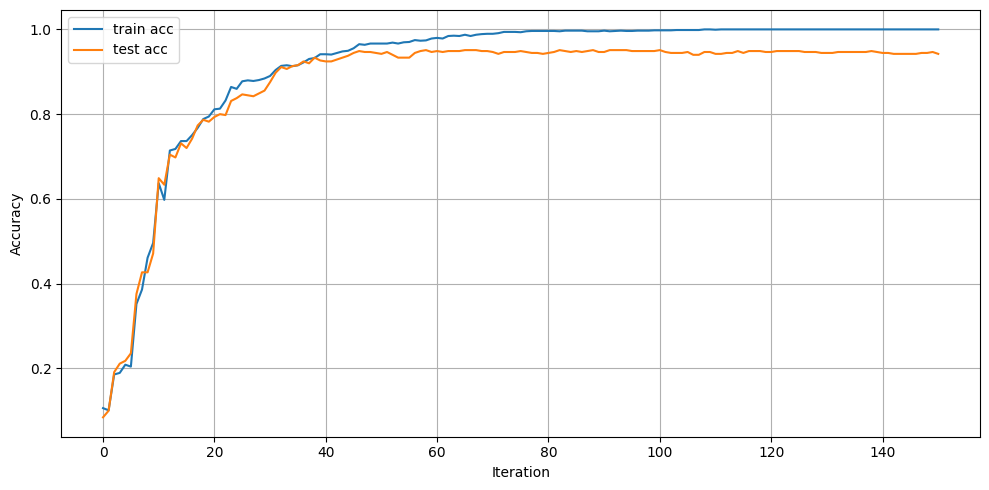

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(cb.train_acc, label="train acc")
ax.plot(cb.test_acc, label="test acc")
ax.set_xlabel("Iteration")
ax.set_ylabel("Accuracy")
ax.grid(True)
ax.legend()

fig.tight_layout()
plt.show()

### `Эксперименты с числом слоев (0.6 балла)`

Ясно, что из-за случайного начального приближения с каждым запуском обучения мы будем получать различное качество. Попробуем обучить нашу нейросеть с разным числом слоев несколько раз.

Заполните матрицы `accs_train` и `accs_test`. В позиции `[i, j]` должна стоять величина доли правильных ответов сети с $i+1$ полносвязными слоями при $j$-м запуске (все запуски идентичны).

In [ ]:
accs_train = np.zeros((5, 5))
accs_test = np.zeros((5, 5))

In [ ]:
for count_layers in range(1, 6):
  for num_init in range(5):
    network = make_network(input_size, hidden_layers_size, output_size, count_layers, ReLU)
    weights = get_weights(network)
    cb = Callback(network, X_train, y_train, X_test, y_test, print=False)

    res = minimize(
        compute_loss_grad, weights,
        args=[network, X_train, y_train],
        method="L-BFGS-B",
        jac=True,
        callback=cb.call
    )
    accs_train[count_layers-1, num_init] = cb.train_acc[-1]
    accs_test[count_layers-1, num_init] = cb.test_acc[-1]


Построим боксплоты полученного качества (горизонтальная линия в каждом столбце — среднее, прямоугольник показывает разброс).

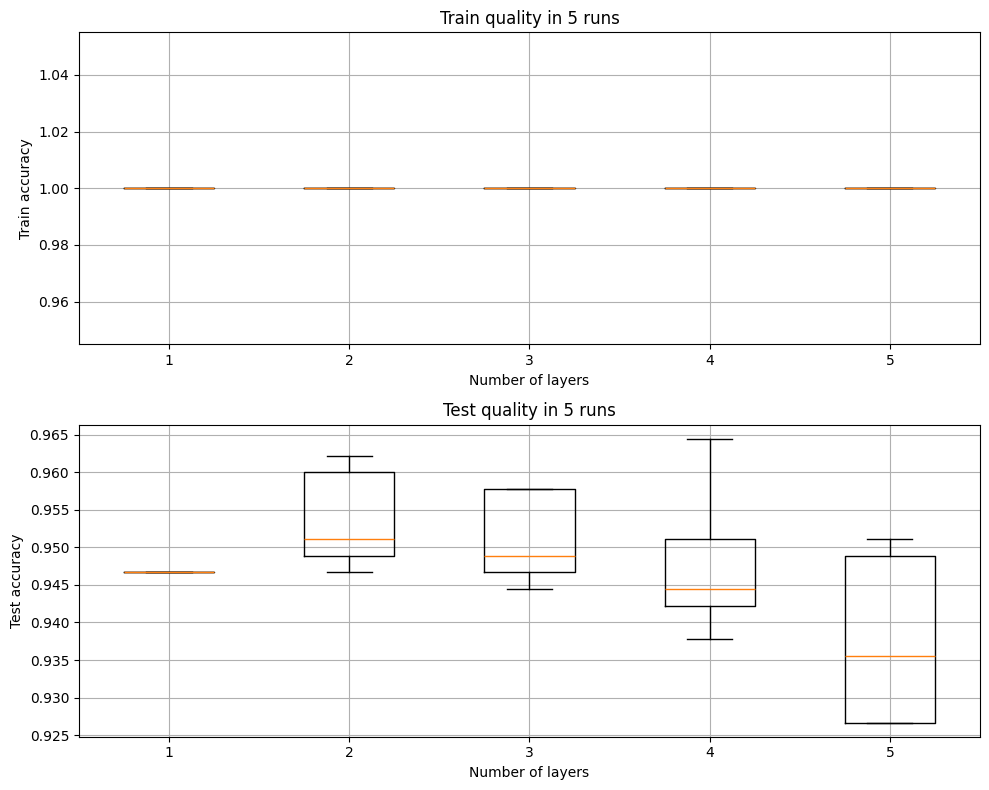

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

axes[0].boxplot(accs_train.T, showfliers=False)
axes[1].boxplot(accs_test.T, showfliers=False)

axes[0].set_xlabel("Number of layers")
axes[1].set_xlabel("Number of layers")

axes[0].set_ylabel("Train accuracy")
axes[1].set_ylabel("Test accuracy")

axes[0].set_title("Train quality in 5 runs")
axes[1].set_title("Test quality in 5 runs")

axes[0].grid(True)
axes[1].grid(True)

fig.tight_layout()
plt.show()

Дайте развёрнутый ответ на вопросы (в этой же ячейке):
* Как изменяются качество на обучении и контроле и устойчивость процесса обучения при увеличении числа слоев?
* Можно ли сказать, что логистическая регрессия (линейная модель) дает качество хуже, чем нелинейная модель?

__Ответы:__

1. На обучении модель почти всегда достигает максимальную точность равную единицу, в независимости, от количества слоев. Устойчивость процесса при увеличении числа слоев имеет неизвестную зависимость, она как может уменьшаться, так и увеличиваться. Можно сказать, что при увеличении слоев градиентам сложнее течь до начальных слоев и как-то их менять, поэтому при увеличении количества слоев качество модели может ухудшаться. Начальная инициализация весов вносит свой вклад в случайность.

2. Нельзя сказать, что логистическая регрессия дает качество хуже, так как это зависит от структуры данных. Нелинейные модели менее интерпретируемые, чем логистическая регрессия, которая предпочительнее, если данные разделимы. В каких-то задачах линейная модель может выигрывать нелинейную по качеству.

### `Эксперименты c различными инициализациями весов (0.6 балла)`

Как уже было сказано, начальная инициализация весов нейронной сети может сильно влиять на процесс ее обучения и, как следствие, на ее качество.

В этом пункте вам предлагается попробовать обучить несколько нейронных сетей с различными инициализациями слоев.

Для этого необходимо реализовать функцию, инициализирующую веса линейных слоёв нашей нейронной сети. Добавьте в функционал данного метода возможность инициализировать его веса с помощью инициализации Kaiming (используется, если в нейронной сети в качестве функций активации используется ReLU) и инициализации Xavier (используется, если в нейронной сети в качестве функций активации используется Tanh или Sigmoid):

In [ ]:
def initialize_network(network, initialization):
    for layer in network:
        if isinstance(layer, Dense):
            input_units, output_units = layer.weights.shape
            if initialization == 'Kaiming':
                layer.weights = np.random.normal(loc=0, scale=np.sqrt(2/input_units), size=(input_units, output_units))
            elif initialization == 'Xavier':
                layer.weights = np.random.normal(loc=0, scale=np.sqrt(2/(input_units + output_units)), size=(input_units, output_units))
            else:
                # Initialize weights with small random numbers from normal distribution.
                # In this case `initialization` represents a standard deviation
                # for normal distribution.
                layer.weights = np.random.randn(input_units, output_units) * initialization
            layer.biases = np.zeros_like(layer.biases)

            layer.params = [layer.weights, layer.biases]

Теперь попробуйте для каждой из 3 инициализаций обучить нейронную сеть несколько раз. Попробуйте проделать данную операцию при зафиксированном числе слоев равным 3, 4 и 5.

#### `3 слоя`

Зафиксируйте в сети число слоев равное трем.

Заполните матрицы `accs_train` и `accs_test`. В позиции `[i, j]` должна стоять величина доли правильных ответов сети при $j$-м запуске (все запуски идентичны) с инициализацией Kaiming при $i = 3$, с инициализацией Xavier при $i = 4$ и с инициализацией из нормального распределения с фиксированными параметрами при $0 \leqslant i \leqslant 2$ (попробуйте здесь 3 разных параметра для стандартного отклонения для нормального распределения, например: `1e-3`, `1e-2`, `1e-1`). Заметьте, что при большом числе слоев слишком низкое стандартное отклонение может не давать нейронной сети нормально обучиться.

In [ ]:
init_vars = [1e-3, 1e-2, 1e-1, 'Kaiming', 'Xavier']

In [ ]:
accs_train = np.zeros((5, 5))
accs_test = np.zeros((5, 5))

In [ ]:
for i, var in enumerate(init_vars):
  for num_init in range(5):
    network = make_network(input_size, hidden_layers_size, output_size, 3, ReLU)
    initialize_network(network, var)

    weights = get_weights(network)
    cb = Callback(network, X_train, y_train, X_test, y_test, print=False)

    res = minimize(
        compute_loss_grad, weights,
        args=[network, X_train, y_train],
        method="L-BFGS-B",
        jac=True,
        callback=cb.call
    )
    accs_train[i, num_init] = cb.train_acc[-1]
    accs_test[i, num_init] = cb.test_acc[-1]

Построим боксплоты полученного качества (горизонтальная линия в каждом столбце — среднее, прямоугольник показывает разброс).

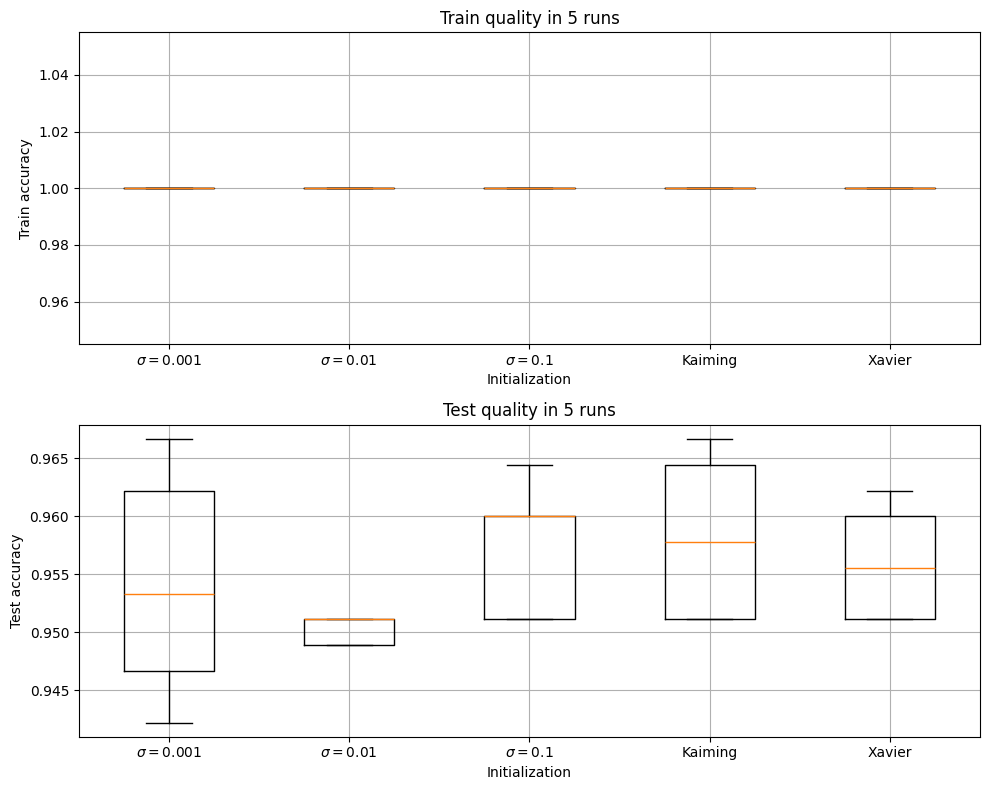

In [ ]:
init_vars_for_plot = [(x if isinstance(x, str) else fr"$\sigma = {x}$") for x in init_vars]

fig, axes = plt.subplots(2, 1, figsize=(10, 8))

axes[0].boxplot(accs_train.T, showfliers=False)
axes[1].boxplot(accs_test.T, showfliers=False)

axes[0].set_xlabel("Initialization")
axes[0].set_xticklabels(init_vars_for_plot)
axes[1].set_xlabel("Initialization")
axes[1].set_xticklabels(init_vars_for_plot)

axes[0].set_ylabel("Train accuracy")
axes[1].set_ylabel("Test accuracy")

axes[0].set_title("Train quality in 5 runs")
axes[1].set_title("Test quality in 5 runs")

axes[0].grid(True)
axes[1].grid(True)

fig.tight_layout()
plt.show()

#### `4 слоя`

Выполните тут тот же код, что и в предыдущем пункте, но только уже с 4 слоями в сети.

In [ ]:
init_vars = [5e-3, 1e-2, 1e-1, 'Kaiming', 'Xavier']

In [ ]:
accs_train = np.zeros((5, 5))
accs_test = np.zeros((5, 5))

In [ ]:
for i, var in enumerate(init_vars):
  for num_init in range(5):
    network = make_network(input_size, hidden_layers_size, output_size, 4, ReLU)
    initialize_network(network, var)

    weights = get_weights(network)
    cb = Callback(network, X_train, y_train, X_test, y_test, print=False)

    res = minimize(
        compute_loss_grad, weights,
        args=[network, X_train, y_train],
        method="L-BFGS-B",
        jac=True,
        callback=cb.call
    )
    accs_train[i, num_init] = cb.train_acc[-1]
    accs_test[i, num_init] = cb.test_acc[-1]

Построим боксплоты полученного качества (горизонтальная линия в каждом столбце — среднее, прямоугольник показывает разброс).

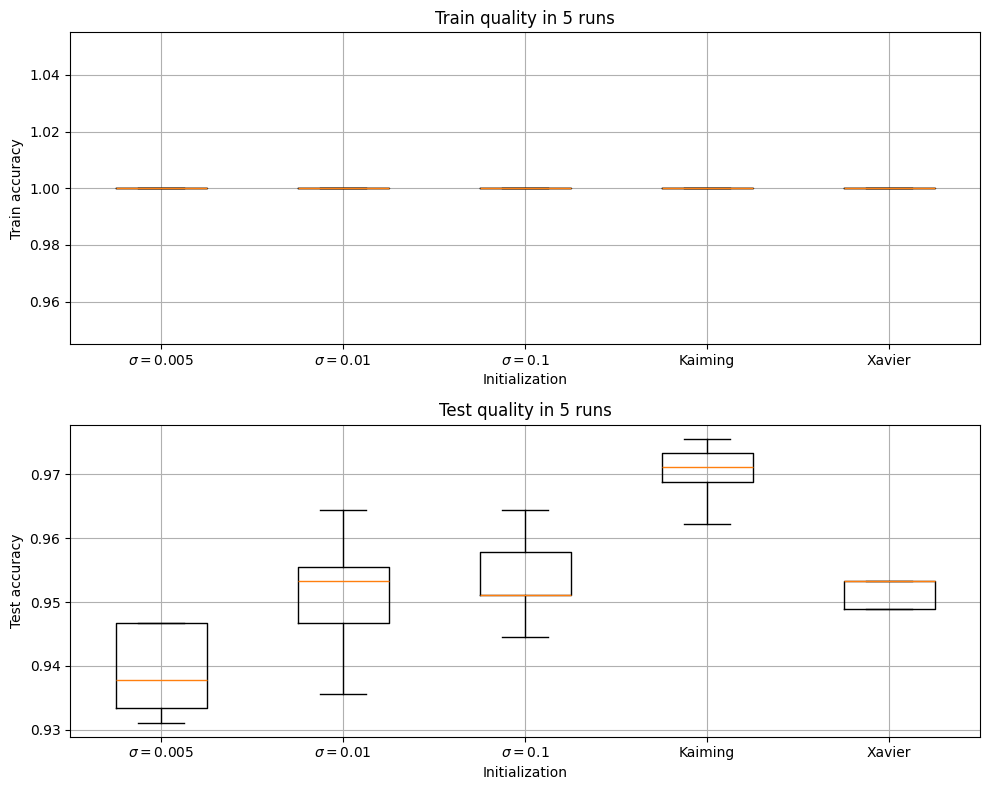

In [ ]:
init_vars_for_plot = [(x if isinstance(x, str) else fr"$\sigma = {x}$") for x in init_vars]

fig, axes = plt.subplots(2, 1, figsize=(10, 8))

axes[0].boxplot(accs_train.T, showfliers=False)
axes[1].boxplot(accs_test.T, showfliers=False)

axes[0].set_xlabel("Initialization")
axes[0].set_xticklabels(init_vars_for_plot)
axes[1].set_xlabel("Initialization")
axes[1].set_xticklabels(init_vars_for_plot)

axes[0].set_ylabel("Train accuracy")
axes[1].set_ylabel("Test accuracy")

axes[0].set_title("Train quality in 5 runs")
axes[1].set_title("Test quality in 5 runs")

axes[0].grid(True)
axes[1].grid(True)

fig.tight_layout()
plt.show()

#### `5 слоев`

Выполните тут тот же код, что и в предыдущем пункте, но только уже с 5 слоями в сети.

In [ ]:
init_vars = [1e-2, 1e-1, 1e0, 'Kaiming', 'Xavier']

In [ ]:
accs_train = np.zeros((5, 5))
accs_test = np.zeros((5, 5))

In [ ]:
for i, var in enumerate(init_vars):
  for num_init in range(5):
    network = make_network(input_size, hidden_layers_size, output_size, 5, ReLU)
    initialize_network(network, var)

    weights = get_weights(network)
    cb = Callback(network, X_train, y_train, X_test, y_test, print=False)

    res = minimize(
        compute_loss_grad, weights,
        args=[network, X_train, y_train],
        method="L-BFGS-B",
        jac=True,
        callback=cb.call
    )
    accs_train[i, num_init] = cb.train_acc[-1]
    accs_test[i, num_init] = cb.test_acc[-1]

Построим боксплоты полученного качества (горизонтальная линия в каждом столбце — среднее, прямоугольник показывает разброс).

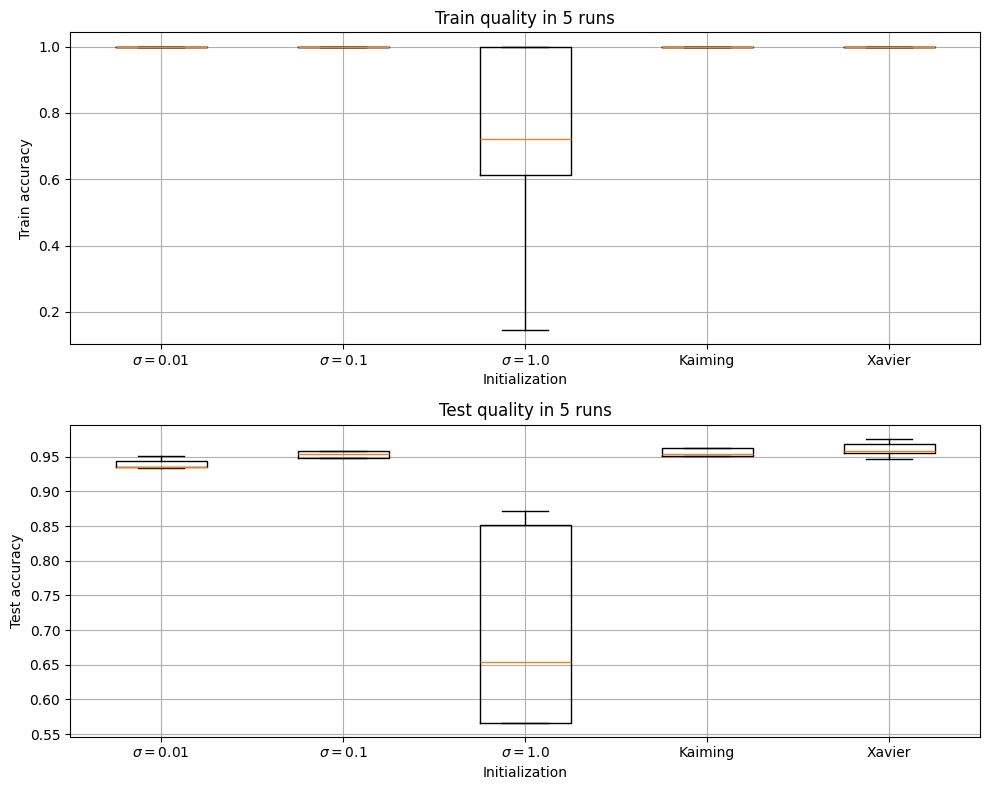

In [ ]:
init_vars_for_plot = [(x if isinstance(x, str) else fr"$\sigma = {x}$") for x in init_vars]

fig, axes = plt.subplots(2, 1, figsize=(10, 8))

axes[0].boxplot(accs_train.T, showfliers=False)
axes[1].boxplot(accs_test.T, showfliers=False)

axes[0].set_xlabel("Initialization")
axes[0].set_xticklabels(init_vars_for_plot)
axes[1].set_xlabel("Initialization")
axes[1].set_xticklabels(init_vars_for_plot)

axes[0].set_ylabel("Train accuracy")
axes[1].set_ylabel("Test accuracy")

axes[0].set_title("Train quality in 5 runs")
axes[1].set_title("Test quality in 5 runs")

axes[0].grid(True)
axes[1].grid(True)

fig.tight_layout()
plt.show()

Дайте развёрнутый ответ на вопросы (в этой же ячейке):
* Как отличаются качество на обучении и контроле и устойчивость процесса обучения при различных инициализациях?
* Какие инициализации помогают обучать более глубокие сети?

__Ответы:__

1. На обучении, в основном, все достигают точности 1, но при неправильной начальной инициализации даже процесс обучения может не сойтись ($\sigma = 1.0$, 5 слоев). Инициализация Kaiming показывает высокое, относительно других инициализаций на большем количестве слоев (4, 5). При выборе случайной $\sigma$ нейронная сеть может не сойтись, в отличие от именных инициализаций, которые имеют научное обоснование, поэтому являются более устойчивым, относительно случайных.

2. Инициализация Kaiming-а предпочтительнее функции активации ReLU, которая в свою очередь борется с затуханием и взрывом градиентов, связанных с увеличением количества слоев. Поэтому она помогает обучать более глубокие сети. Если рассматривать другие функции активации, такие как сигмоида и tanh, то предпочтительнее инициализация Xavier-а, которая борется с аналогичными проблемами, позволяя обучать более глубокие нейронные сети.

Теперь сравним скорость обучения при различных инициализациях. Создайте два списка списков `accs_test_on_iterations`, `accs_train_on_iterations` в каждом из которых в позиции `[i]` (см. описание `i` в предыдущем пункте) будет лежать список из значений `accuracy` на тестовой и обучающей выборках соотвественно, полученных во время обучения модели. Количество слоев в сети зафиксируйте равным 4.

In [ ]:
init_vars = [1e-3, 1e-2, 1e-1, 'Kaiming', 'Xavier']

In [ ]:
accs_test_on_iterations = []
accs_train_on_iterations = []

In [ ]:
for i, var in enumerate(init_vars):
    network = make_network(input_size, hidden_layers_size, output_size, 4, ReLU)
    initialize_network(network, var)

    weights = get_weights(network)
    cb = Callback(network, X_train, y_train, X_test, y_test, print=False)

    res = minimize(
        compute_loss_grad, weights,
        args=[network, X_train, y_train],
        method="L-BFGS-B",
        jac=True,
        callback=cb.call
    )
    accs_train_on_iterations.append(cb.train_acc)
    accs_test_on_iterations.append(cb.test_acc)

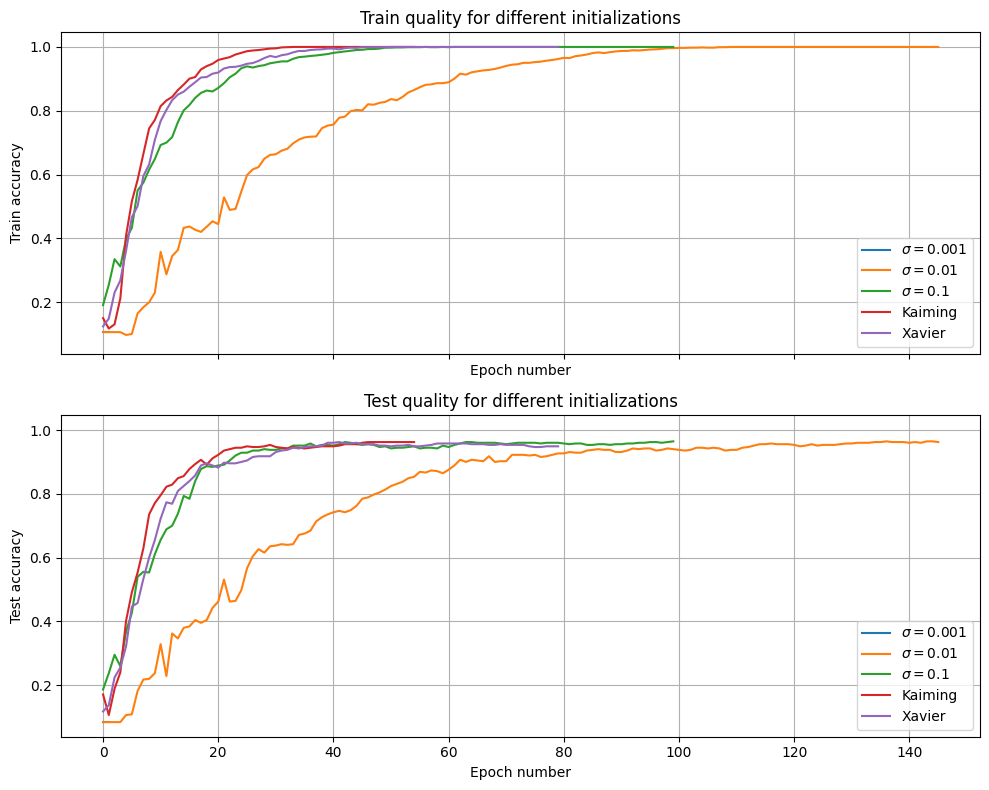

In [ ]:
init_vars_for_plot = [(x if isinstance(x, str) else fr"$\sigma = {x}$") for x in init_vars]

fig, ax = plt.subplots(2, 1, sharex=True, sharey=True,  figsize=(10, 8))

for idx, label in enumerate(init_vars_for_plot):
    ax[0].plot(accs_train_on_iterations[idx], label=label)
    ax[1].plot(accs_test_on_iterations[idx], label=label)

for idx, key in enumerate(["Train", "Test"]):
    ax[idx].set_title(f"{key} quality for different initializations")
    ax[idx].set_xlabel("Epoch number")
    ax[idx].set_ylabel(f"{key} accuracy")
    ax[idx].grid(True)
    ax[idx].legend()



fig.tight_layout()
plt.show()

Дайте развёрнутый ответ на вопросы (в этой же ячейке):
* Как меняется скорость cходимости в зависимости от выбранной инициализации?

__Ответы:__

Инициализация маленьким $\sigma$ показывает более не стабильное и медленное обучение, в отличие от остальных инициализаций. Инициализация Xavier и Kaiming показывает быструю сходимость с высоким качеством, они примерно в одно время выходят на одинаковое качество и далее Xavier колеблется возле него. Инициализация через выбор $\sigma$ показывает более медленную скорость сходимости, в отличии от именных инициализаций.

### `Эксперименты c различными функциями активации (0.6 балла)`

Проверим теперь, с какой функцией активации нейронная сеть будет обучаться лучше.

В этом пункте вам предлагается попробовать обучить несколько нейронных сетей с различными функциями активации.

Для этого нам нужно реализовать еще 2 слоя: для функций активации `Tanh` и `Sigmoid`.

In [ ]:
class Tanh:
    """
    tanh(y) = (e^y - e^(-y)) / (e^y + e^(-y))
    Используйте функцию np.tanh для подсчета гиперболического тангенса.
    Вы можете сами реализовать подсчет tanh, но тогда вам нужно устойчиво его вычислять.
    """
    def __init__(self):
        self.params = [] # Tanh has no parameters

    def forward(self, input):
        """
        Apply elementwise Tanh to [batch, num_units] matrix
        """
        self.input = input
        self.tanh = np.tanh(input)
        return self.tanh

    def backward(self, grad_output):
        """
        Compute gradient of loss w.r.t. Tanh input
        grad_output shape: [batch, num_units]
        output 1 shape: [batch, num_units]
        output 2: []
        """
        return (1 - self.tanh**2) * grad_output, []

    def __repr__(self):
        return 'Tanh()'

In [ ]:
from scipy.special import expit

class Sigmoid:
    """
    sigmoid(y) = 1 / (1 + e^(-y))
    Используйте функцию expit для подсчета сигмоиды.
    Вы можете сами реализовать подсчет сигмоиды, но тогда вам нужно устойчиво ее вычислять.
    """
    def __init__(self):
        self.params = [] # Sigmoid has no parameters

    def forward(self, input):
        """
        Apply elementwise Sigmoid to [batch, num_units] matrix
        """
        self.input = input
        self.sigmoida = expit(input)
        return self.sigmoida

    def backward(self, grad_output):
        """
        Compute gradient of loss w.r.t. Sigmoid input
        grad_output shape: [batch, num_units]
        output 1 shape: [batch, num_units]
        output 2: []
        """
        return self.sigmoida * (1 - self.sigmoida) * grad_output, []

    def __repr__(self):
        return 'Sigmoid()'

Теперь попробуйте для каждой из 3 функций активации обучить нейронную сеть несколько раз. Число слоев зафиксируйте равным 3. В случае `Tanh` и `Sigmoid` используйте инициализацию `Xavier`, а в случае `ReLU` используйте инициализацию `Kaiming`.

Заполните матрицы `accs_train` и `accs_test`. В позиции `[i, j]` должна стоять величина доли правильных ответов сети при $j$-м запуске (все запуски идентичны) с функцией активации $ReLU$ при $i = 0$, с функцией активации $Tanh$ при $i = 1$ и с функцией активации $Sigmoid$ при $i = 2$.

In [ ]:
act_func_vars = ['Tanh', 'Sigmoid', 'ReLU']
init_for_act_funcs = ['Xavier', 'Xavier', 'Kaiming']

In [ ]:
accs_train = np.zeros((3, 5))
accs_test = np.zeros((3, 5))

In [ ]:
for i, act_func in enumerate(act_func_vars):
  if act_func == 'Tanh':
    activation = Tanh
  elif act_func == 'Sigmoid':
    activation = Sigmoid
  else:
    activation = ReLU

  for num_init in range(5):
    network = make_network(input_size, hidden_layers_size, output_size, 3, activation)
    initialize_network(network, var)

    weights = get_weights(network)
    cb = Callback(network, X_train, y_train, X_test, y_test, print=False)

    res = minimize(
        compute_loss_grad, weights,
        args=[network, X_train, y_train],
        method="L-BFGS-B",
        jac=True,
        callback=cb.call
    )
    accs_train[i, num_init] = cb.train_acc[-1]
    accs_test[i, num_init] = cb.test_acc[-1]


Построим боксплоты полученного качества (горизонтальная линия в каждом столбце — среднее, прямоугольник показывает разброс).

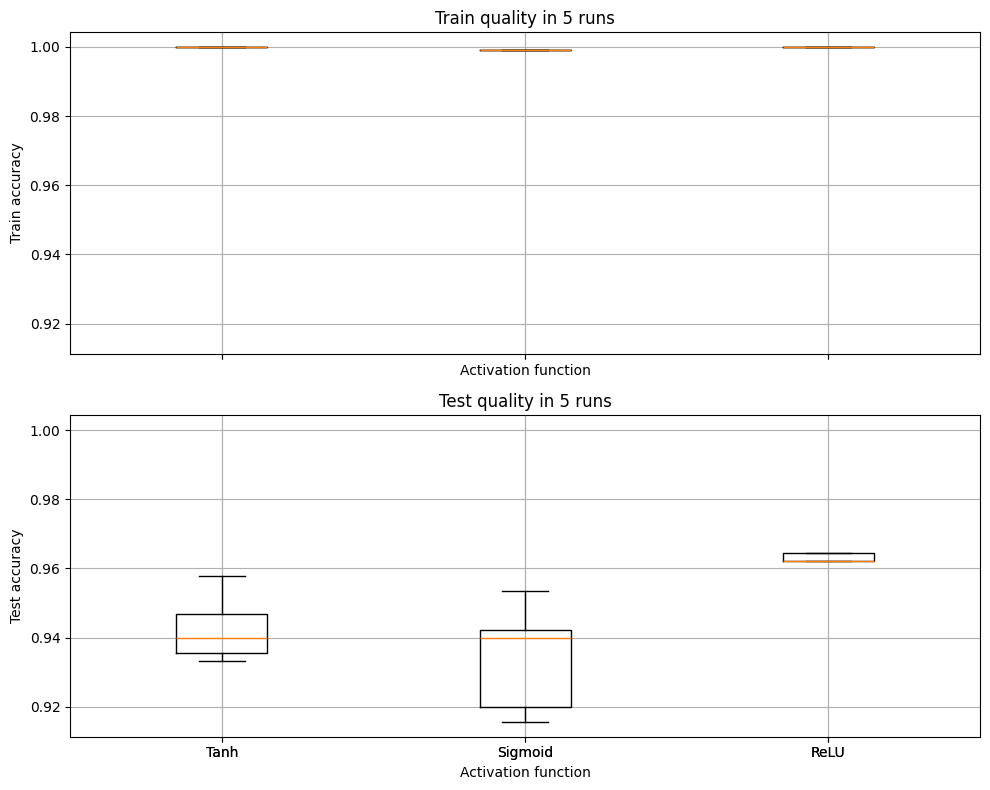

In [ ]:
fig, ax = plt.subplots(2, 1, sharex=True, sharey=True,  figsize=(10, 8))

ax[0].boxplot(accs_train.T, tick_labels=act_func_vars, showfliers=False)
ax[1].boxplot(accs_test.T, tick_labels=act_func_vars, showfliers=False)

ax[0].set_title("Train quality in 5 runs")
ax[1].set_title("Test quality in 5 runs")

ax[0].set_xlabel("Activation function")
ax[1].set_xlabel("Activation function")

ax[0].set_ylabel("Train accuracy")
ax[1].set_ylabel("Test accuracy")

ax[0].grid(True)
ax[1].grid(True)

fig.tight_layout()
plt.show()

Дайте развёрнутый ответ на вопросы (в этой же ячейке):
* Как отличаются качество на обучении и контроле и устойчивость процесса обучения при различных функциях активации?

__Ответы:__

На графике заметно, что из всех функций активаций ReLU показывает лучшее качество и устойчивость на тестовой выборке, в отличие от сигмоиды, которая колеблется в качестве при разных запусках. Tanh показывает результаты лучше, чем сигмоида, по качеству и устойчивости, но всё равно уступает по качеству функции активации ReLU. На обучении Tanh и ReLU сходятся к точности 1, сигмоида почти достигает данного качества.

\* Несколько фрагментов кода в задании написаны на основе материалов [курса по глубинному обучению на ФКН НИУ ВШЭ](https://www.hse.ru/ba/ami/courses/205504078.html)

### `Реализация метода оптимизации (1.4 балла)`

В этой части задания реализуйте метод оптимизации SGD + momentum. Упрощённая версия более общего алгоритма [отсюда](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html):

$$
\begin{aligned}
    &\rule{70mm}{0.4pt}                                                             \\
    &\textbf{input}      : \gamma \text{ (lr)}, \: \theta_0 \text{ (params)}, \: X \text{ (data)},       \\
    &\hspace{13mm} \: f(\theta) \text{ (objective)}, \:\mu \text{ (momentum)}       \\[-1.ex]
    &\rule{70mm}{0.4pt}                                                             \\
    &\textbf{for} \: t=1 \: \textbf{to} \: \ldots \: \textbf{do}                    \\
    &\hspace{5mm}\mathcal{X} \leftarrow \texttt{list\_of\_random\_batches}(X)\\
    &\hspace{5mm}\textbf{for} \: i=1 \: \textbf{to} \: \ldots \: \textbf{do}                    \\
    &\hspace{10mm}g_t\leftarrow   \nabla_{\theta} f_t (\theta_{t-1},\mathcal{X}_i)      \\
    &\hspace{10mm}\textbf{if} \: \mu \neq 0                                          \\
    &\hspace{15mm}\textbf{if} \: t > 1                                              \\
    &\hspace{20mm} \textbf{b}_t \leftarrow \mu \textbf{b}_{t-1} + g_t               \\
    &\hspace{15mm}\textbf{else}                                                     \\
    &\hspace{20mm} \textbf{b}_t \leftarrow g_t                                      \\
    &\hspace{15mm} g_t  \leftarrow  \textbf{b}_t                                     \\
    &\hspace{10mm}\theta_t \leftarrow \theta_{t-1} - \gamma g_t                      \\[-1.ex]
    &\rule{70mm}{0.4pt}                                                             \\[-1.ex]
    &\bf{return} \:  \theta_t                                                       \\[-1.ex]
    &\rule{70mm}{0.4pt}                                                             \\[-1.ex]
\end{aligned}
$$

Проще всего будет написать `custom minimizer` (смотри [документацию scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html)).

In [ ]:
from scipy.optimize import OptimizeResult

def SGD(fun, x0, args, **kwargs) -> OptimizeResult:
    callback = kwargs['callback']   # feed weights from each iteration to update network and log metrics
    mu = kwargs['momentum']
    n_iter = kwargs['n_iter']
    gamma = kwargs['lr']
    jac = kwargs['jac']
    batch_size = kwargs['batch_size']

    net, X, y = args

    theta = x0
    callback(theta)

    size_data = X.shape[0]
    fun_result = fun(theta, args=[net, X, y])[0]
    stop_loss = 0
    b = 0

    for t in range(1, n_iter+1): # epochs
      fun_pred = fun_result
      indices = np.random.permutation(size_data)
      batches = np.array_split(indices, size_data // batch_size)

      for i, batch_indices in enumerate(batches): #batch iters
        X_batch, y_batch = X[batch_indices], y[batch_indices]
        g = fun(theta, args=[net, X_batch, y_batch])[1]

        if mu != 0:
          b = mu * b + g
          g = b

        theta = theta - gamma * g

      callback(theta)
      fun_result = fun(theta, args=[net, X, y])[0]

      if abs(fun_result - fun_pred) < 1e-4:
        stop_loss += 1
        if stop_loss > 1:
          break


    return OptimizeResult(x=theta, success=True, nit=t, fun=fun_result)


**Задание 1. (0.5 балла)** Продемонстрируйте правильную работу метода оптимизации, получив `test_accuracy>=0.9`.

In [ ]:
network = make_network(input_size, hidden_layers_size, output_size, 5, ReLU)
initialize_network(network, "Kaiming")

weights = get_weights(network)

cb = Callback(network, X_train, y_train, X_test, y_test, print=False)

res = SGD(
      compute_loss_grad, weights,
      args=[network, X_train, y_train],
      method=SGD,
      jac=True,
      callback=cb.call,
      momentum=0.8,
      n_iter=1000,
      lr=1e-2,
      batch_size=32
)

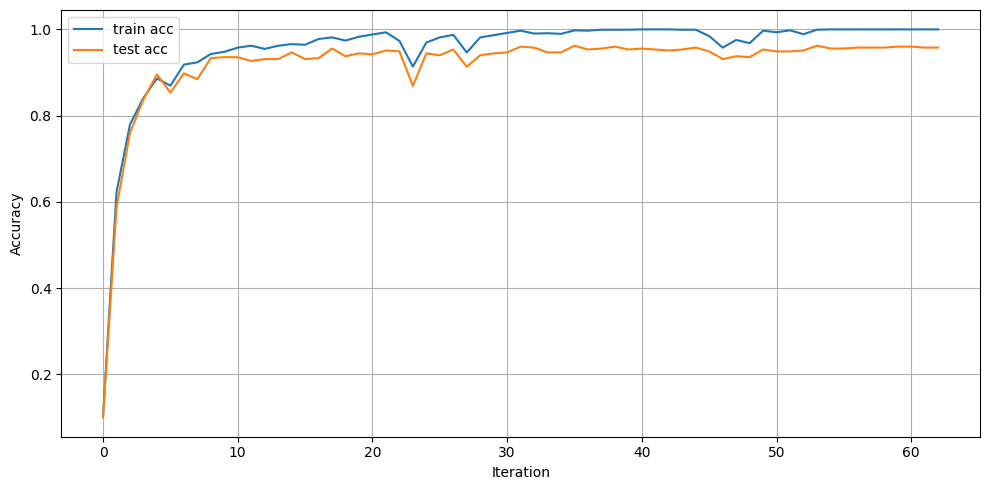

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(cb.train_acc, label="train acc")
ax.plot(cb.test_acc, label="test acc")
ax.set_xlabel("Iteration")
ax.set_ylabel("Accuracy")
ax.grid(True)
ax.legend()

fig.tight_layout()
plt.show()

**Задание 2. (0.8 балла)** Сравните три алгоритма:
1. LBFGS-B
2. SGD
3. SGD + momentum

Для этого одновременно переберите следующие гиперпараметры:
- значения `lr` на отрезке `[1e-3, 1e-1]` по логарифмической сетке
- два значения `momentum`: `0` и `0.9`
- значения `batch_size`: `8` и `32`

В каждом запуске сохраняйте три метрики: итоговое accuracy на тесте и на трейне и время обучения.

Для каждого из трёх алгоритмов выберите лучшие `lr` и `batch_size` по `test_accuracy`. Постройте для них кривые обучения (пример ниже). Сделайте выводы.

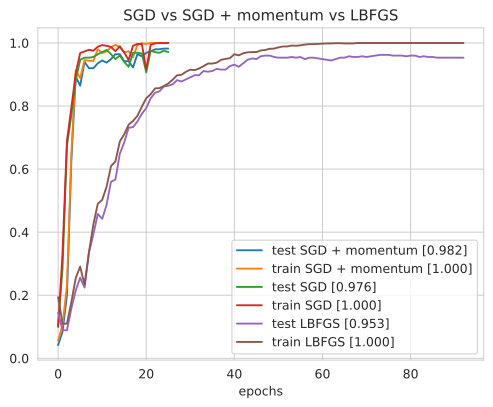

In [ ]:
lr_vars = np.logspace(-3, -1, num=3)
momentum_vars = [0, 0.9]
batch_size_vars = [8, 32]
model_names = ["LBFGS-B", "SGD", "SGD+momentum"]

In [ ]:
import time

In [ ]:
accs_time = []
accs_train = []
accs_test = []

In [ ]:
# перебор для LBFGS-B

network = make_network(input_size, hidden_layers_size, output_size, 5, ReLU)
initialize_network(network, "Kaiming")

weights = get_weights(network)
cb = Callback(network, X_train, y_train, X_test, y_test, print=False)

start_time = time.time()
res = minimize(
    compute_loss_grad, weights,
    args=[network, X_train, y_train],
    method="L-BFGS-B",
    jac=True,
    callback=cb.call
)
accs_time = time.time() - start_time
accs_train.append(cb.train_acc)
accs_test.append(cb.test_acc)

In [ ]:
# перебор для SGD

train_acc_sgd = [[[] for _ in range(2)] for _ in range(3)]
test_acc_sgd = [[[] for _ in range(2)] for _ in range(3)]
time_sgd = np.zeros((3, 2))
max_test_acc_sgd = 0
max_params_sgd = {"batch_size": None, "lr": None}

for i, lr in enumerate(lr_vars):
  for j, batch_size in enumerate(batch_size_vars):
    network = make_network(input_size, hidden_layers_size, output_size, 5, ReLU)
    initialize_network(network, "Kaiming")

    weights = get_weights(network)
    cb = Callback(network, X_train, y_train, X_test, y_test, print=False)

    start_time = time.time()
    res = SGD(
          compute_loss_grad, weights,
          args=[network, X_train, y_train],
          method=SGD,
          jac=True,
          callback=cb.call,
          momentum=0,
          n_iter=1000,
          lr=lr,
          batch_size=batch_size
    )

    time_sgd[i, j] = time.time() - start_time
    train_acc_sgd[i][j] = cb.train_acc
    test_acc_sgd[i][j] = cb.test_acc

    if cb.test_acc[-1] > max_test_acc_sgd:
      max_test_acc_sgd = cb.test_acc[-1]
      max_params_sgd["batch_size"] = batch_size
      max_params_sgd['lr'] = lr

print(f"Best params: {max_params_sgd} with test_acc = {max_test_acc_sgd:.3f}")

Best params: {'batch_size': 8, 'lr': 0.01} with test_acc = 0.969


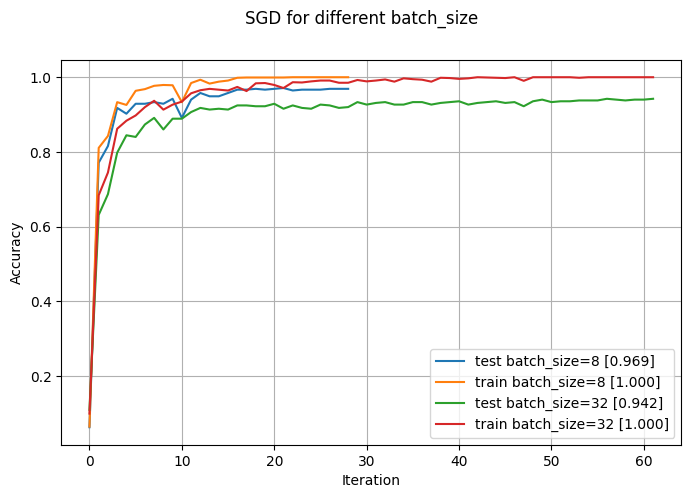

In [ ]:
# сравнение разных batch_size для SGD

fig, ax = plt.subplots(1, 1, figsize=(8, 5))

ax.plot(test_acc_sgd[1][0], label=f"test batch_size=8 [{test_acc_sgd[1][0][-1]:.3f}]")
ax.plot(train_acc_sgd[1][0], label=f"train batch_size=8 [{train_acc_sgd[1][0][-1]:.3f}]")

ax.plot(test_acc_sgd[1][1], label=f"test batch_size=32 [{test_acc_sgd[1][1][-1]:.3f}]")
ax.plot(train_acc_sgd[1][1], label=f"train batch_size=32 [{train_acc_sgd[1][1][-1]:.3f}]")

fig.suptitle("SGD for different batch_size")
ax.set_xlabel("Iteration")
ax.set_ylabel("Accuracy")
ax.grid(True)
ax.legend()

plt.show()

In [ ]:
# перебор для SGD + momentum

train_acc_sgdm = [[[] for _ in range(2)] for _ in range(3)]
test_acc_sgdm = [[[] for _ in range(2)] for _ in range(3)]
time_sgdm = np.zeros((3, 2))
max_test_acc_sgdm = 0
max_params_sgdm = {"batch_size": None, "lr": None}

for i, lr in enumerate(lr_vars):
  for j, batch_size in enumerate(batch_size_vars):
    network = make_network(input_size, hidden_layers_size, output_size, 5, ReLU)
    initialize_network(network, "Kaiming")

    weights = get_weights(network)
    cb = Callback(network, X_train, y_train, X_test, y_test, print=False)

    start_time = time.time()
    res = SGD(
          compute_loss_grad, weights,
          args=[network, X_train, y_train],
          jac=True,
          callback=cb.call,
          momentum=0.9,
          n_iter=1000,
          lr=lr,
          batch_size=batch_size
    )

    time_sgdm[i, j] = time.time() - start_time
    train_acc_sgdm[i][j] = cb.train_acc
    test_acc_sgdm[i][j] = cb.test_acc

    if cb.test_acc[-1] > max_test_acc_sgdm:
      max_test_acc_sgdm = cb.test_acc[-1]
      max_params_sgdm["batch_size"] = batch_size
      max_params_sgdm['lr'] = lr

print(f"Best params for SGD + momentum: {max_params_sgdm} with test_acc = {max_test_acc_sgdm:.3f}")

Best params for SGD + momentum: {'batch_size': 8, 'lr': 0.001} with test_acc = 0.969


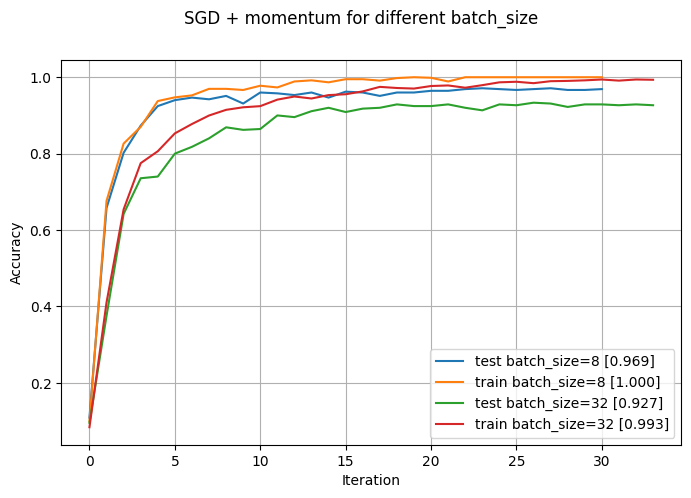

In [ ]:
# сравнение разных batch_size для SGD + momentum

fig, ax = plt.subplots(1, 1, figsize=(8, 5))

ax.plot(test_acc_sgdm[0][0], label=f"test batch_size=8 [{test_acc_sgdm[0][0][-1]:.3f}]")
ax.plot(train_acc_sgdm[0][0], label=f"train batch_size=8 [{train_acc_sgdm[0][0][-1]:.3f}]")

ax.plot(test_acc_sgdm[0][1], label=f"test batch_size=32 [{test_acc_sgdm[0][1][-1]:.3f}]")
ax.plot(train_acc_sgdm[0][1], label=f"train batch_size=32 [{train_acc_sgdm[0][1][-1]:.3f}]")

fig.suptitle("SGD + momentum for different batch_size")
ax.set_xlabel("Iteration")
ax.set_ylabel("Accuracy")
ax.grid(True)
ax.legend()

plt.show()

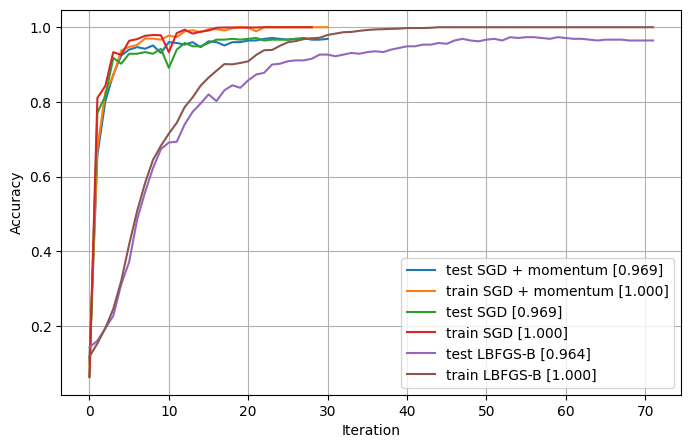

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

ax.plot(test_acc_sgdm[0][0], label=f"test SGD + momentum [{max_test_acc_sgdm:.3f}]")
ax.plot(train_acc_sgdm[0][0], label=f"train SGD + momentum [{train_acc_sgdm[0][0][-1]:.3f}]")

ax.plot(test_acc_sgd[1][0], label=f"test SGD [{max_test_acc_sgd:.3f}]")
ax.plot(train_acc_sgd[1][0], label=f"train SGD [{train_acc_sgd[1][0][-1]:.3f}]")

ax.plot(accs_test[0], label=f"test LBFGS-B [{accs_test[0][-1]:.3f}]")
ax.plot(accs_train[0], label=f"train LBFGS-B [{accs_train[0][-1]:.3f}]")

ax.set_xlabel("Iteration")
ax.set_ylabel("Accuracy")
ax.grid(True)
ax.legend()


plt.show()

**Выводы:**
SGD + momentum и SGD показывают лучшее качество на тестовой выборке, относительно LBFGS-B, который учится медленнее всех оптимизаторов. На графике можно наблюдать, что SGD + momentum делает более плавные скачки на каждой итерации, потому что моментум вносит свой вклад в сходимость.

**Задание 3. (0.1 балла)** Для отобранных в прошлом задании трёх алгоритмов ответье на вопрос: как меняются запуски для двух значений `batch_size`.

**Ответ:**
1. Для SGD: при увеличении размера батча до 32 скорость сходимости уменьшается почти вдвое, также уменьшается качество. При 32 шаги SGD более плавные, чем шаги при размере батча 8.
2. Для SGD + momentum: Время на отобранном наборе параметров алгоритма почти не меняется, при batch_size=32 шаги обучения более плавные, чем при размере 8.

## `Бонусная часть`

### `Реализация метода оптимизации (1 балл)`

Реализуйте метод оптимизации Adam и сравните его работу с SGD + momentum, проведя эксперимент, как в задании 2 (перебор гиперпараметров + кривые обучения).

In [ ]:
from scipy.optimize import OptimizeResult

def Adam(fun, x0, args, **kwargs) -> OptimizeResult:
    callback = kwargs['callback']   # feed weights from each iteration to update network and log metrics
    gamma = kwargs['lr']
    n_iter = kwargs['n_iter']
    beta_1 = kwargs['b1']
    beta_2 = kwargs['b2']
    jac = kwargs['jac']
    batch_size = kwargs['batch_size']

    net, X, y = args

    theta = x0
    callback(theta)

    size_data = X.shape[0]
    fun_result = fun(theta, args=[net, X, y])[0]
    m, v = 0, 0
    stop_loss = 0

    for t in range(1, n_iter+1): # epochs
      fun_pred = fun_result
      indices = np.random.permutation(size_data)
      batches = np.array_split(indices, size_data // batch_size)

      for i, batch_indices in enumerate(batches): #batch iters
        X_batch, y_batch = X[batch_indices], y[batch_indices]
        g = fun(theta, args=[net, X_batch, y_batch])[1]

        m = beta_1 * m + (1 - beta_1) * g
        v = beta_2 * v + (1 - beta_2) * (g ** 2)

        mu = m / (1 - beta_1)
        vu = v / (1 - beta_2)

        theta = theta - gamma * (mu / (np.sqrt(vu) + 1e-4))

      callback(theta)
      fun_result = fun(theta, args=[net, X, y])[0]

      if abs(fun_result - fun_pred) < 1e-4:
        stop_loss += 1
        if stop_loss > 1:
          break

    return OptimizeResult(x=theta, success=True, nit=t, fun=fun_result)

In [ ]:
network = make_network(input_size, hidden_layers_size, output_size, 5, ReLU)
initialize_network(network, "Kaiming")

weights = get_weights(network)

cb = Callback(network, X_train, y_train, X_test, y_test, print=False)

res = Adam(
      compute_loss_grad, weights,
      args=[network, X_train, y_train],
      jac=True,
      callback=cb.call,
      b1=0.01,
      b2=0.01,
      n_iter=1000,
      lr=1e-2,
      batch_size=32
)

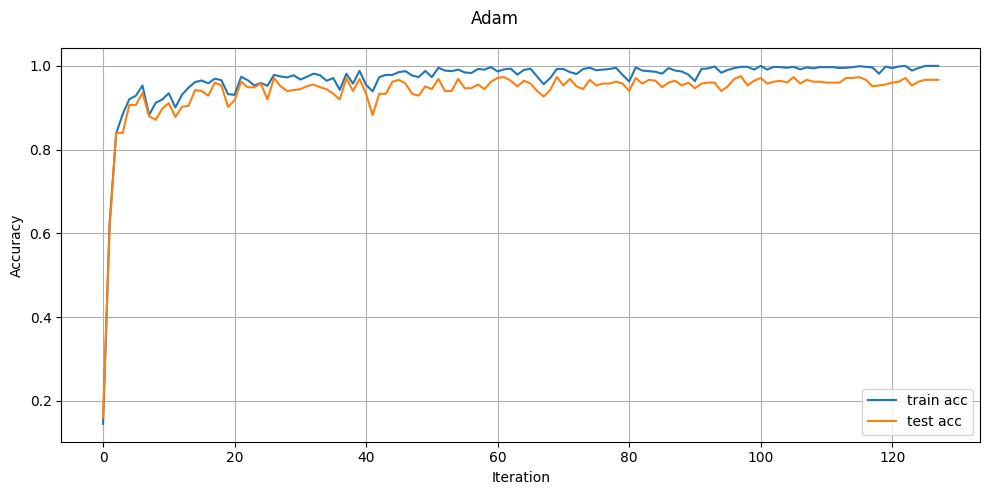

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(cb.train_acc, label="train acc")
ax.plot(cb.test_acc, label="test acc")

fig.suptitle("Adam")
ax.set_xlabel("Iteration")
ax.set_ylabel("Accuracy")
ax.grid(True)
ax.legend()

fig.tight_layout()
plt.show()

In [ ]:
b1_vars = np.logspace(-3, -1, num=3)
b2_vars = np.logspace(-3, -1,num=3)

In [ ]:
# перебор для Adam
from tqdm import tqdm

train_acc_adam = []
test_acc_adam = []
time_adam = []
max_test_acc_adam = 0
max_params_adam = {"batch_size": None, "lr": None, "b1": None, "b2": None}

for lr in tqdm(lr_vars):
  for b1 in b1_vars:
    for b2 in b2_vars:
      for batch_size in batch_size_vars:
        network = make_network(input_size, hidden_layers_size, output_size, 5, ReLU)
        initialize_network(network, "Kaiming")

        weights = get_weights(network)
        cb = Callback(network, X_train, y_train, X_test, y_test, print=False)

        start_time = time.time()
        res = Adam(
            compute_loss_grad, weights,
            args=[network, X_train, y_train],
            jac=True,
            callback=cb.call,
            b1=b1,
            b2=b2,
            n_iter=1000,
            lr=lr,
            batch_size=batch_size
        )

        time_adam.append(time.time() - start_time)
        train_acc_adam.append(cb.train_acc)
        test_acc_adam.append(cb.test_acc)

        if cb.test_acc[-1] > max_test_acc_adam:
          max_test_acc_adam = cb.test_acc[-1]
          max_params_adam["batch_size"] = batch_size
          max_params_adam['lr'] = lr
          max_params_adam['b1'] = b1
          max_params_adam['b2'] = b2

print(f"Best params for Adam: {max_params_adam} with test_acc = {max_test_acc_adam:.3f}")

100%|██████████| 3/3 [21:41<00:00, 433.75s/it]

Best params for Adam: {'batch_size': 8, 'lr': 0.001, 'b1': 0.1, 'b2': 0.001} with test_acc = 0.980


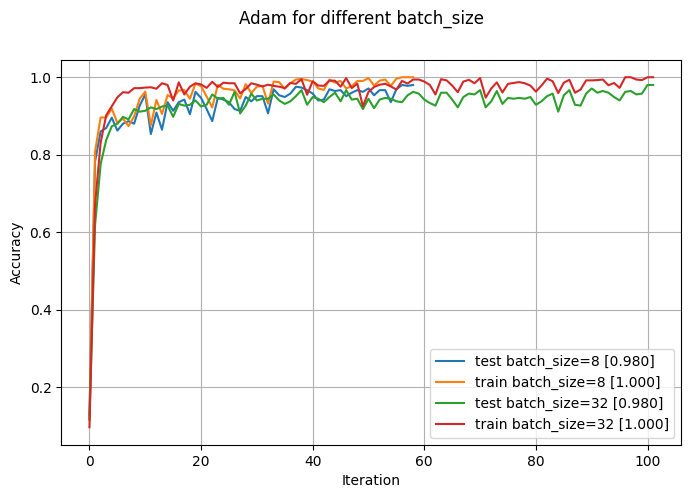

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

ax.plot(test_acc_adam[12], label=f"test batch_size=8 [{test_acc_adam[12][-1]:.3f}]")
ax.plot(train_acc_adam[12], label=f"train batch_size=8 [{train_acc_adam[12][-1]:.3f}]")

ax.plot(test_acc_adam[13], label=f"test batch_size=32 [{test_acc_adam[13][-1]:.3f}]")
ax.plot(train_acc_adam[13], label=f"train batch_size=32 [{train_acc_adam[13][-1]:.3f}]")

fig.suptitle("Adam for different batch_size")
ax.set_xlabel("Iteration")
ax.set_ylabel("Accuracy")
ax.grid(True)
ax.legend()

plt.show()

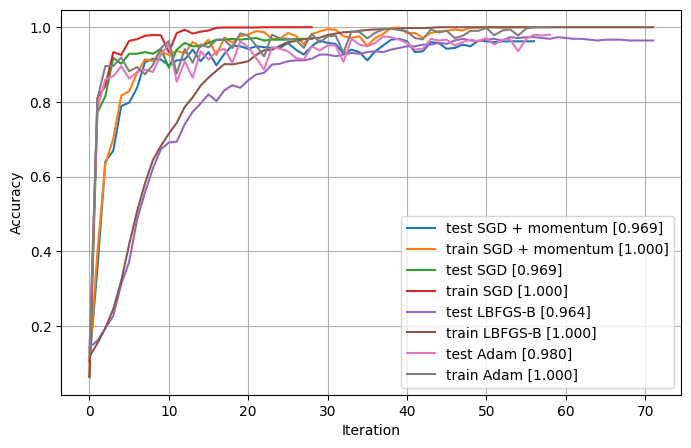

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

ax.plot(test_acc_sgdm[1][1], label=f"test SGD + momentum [{max_test_acc_sgdm:.3f}]")
ax.plot(train_acc_sgdm[1][1], label=f"train SGD + momentum [{train_acc_sgdm[1][1][-1]:.3f}]")

ax.plot(test_acc_sgd[1][0], label=f"test SGD [{max_test_acc_sgd:.3f}]")
ax.plot(train_acc_sgd[1][0], label=f"train SGD [{train_acc_sgd[1][0][-1]:.3f}]")

ax.plot(accs_test[0], label=f"test LBFGS-B [{accs_test[0][-1]:.3f}]")
ax.plot(accs_train[0], label=f"train LBFGS-B [{accs_train[0][-1]:.3f}]")

ax.plot(test_acc_adam[12], label=f"test Adam [{max_test_acc_adam:.3f}]")
ax.plot(train_acc_adam[12], label=f"train Adam [{train_acc_adam[12][-1]:.3f}]")

ax.set_xlabel("Iteration")
ax.set_ylabel("Accuracy")
ax.grid(True)
ax.legend()


plt.show()

**Выводы:** Adam показывает лучшее качество на тестовой выборке, но сходится в два раза дольше SGD, но также как и SGD + momentum, но за то достигает лучшего качества за тоже время. Шаги Adam-а более агрессивные, что не дает ем сойтись не в "широкие" минимумы. При увеличении размера batch_size Adam дольше сходится.

### `Dropout (1 балл)`

Реализуйте слой Dropout. Сравните обучение сети из большого числа слоёв при использовании Dropout и без его использования (предварительно подберите адекватный параметр $p$). Сделайте выводы.

In [ ]:
class Dropout:
    def __init__(self, p):
        self.p = p
        self.params = []

    def forward(self, input, train=True):
        """
        Drops part of num_units with p bernouli distribution
        Input shape: [batch, num_units]
        Output shape: [batch, num_units]
        """
        self.input = input
        if train:
          self.mask = np.random.binomial(n=1, p=1-self.p, size=self.input.shape[1])
          return (self.input * self.mask) / (1 - self.p)
        return self.input

    def backward(self, grad_output):
        """
        compute dropout's gradients
        grad_output shape: [batch, num_units]
        output shapes: [batch, num_units], []
        """
        return (grad_output * self.mask) / (1 -self.p), []

    def __repr__(self):
        return f'Dropout({self.p})'

In [ ]:
def forward_with_dropout(network, X, train=True):
    """
    Perform forward pass through the network.

    network: list of layers
    X: raw data
    X shape: [batch, features_num]

    output:
    output shape: [batch, out_features_num]
    """
    input = X
    for layer in network:
        if isinstance(layer, Dropout) and (not train):
          output = layer.forward(input, False)
        else:
          output = layer.forward(input)
        input = output
    return output

In [ ]:
def predict_with_dropout(network, X):
    """
    Returns predictions for each object in X.

    network: list of layers
    X: raw data
    X shape: [batch, features_num]

    output: array of classes, each from 0 to 9
    output shape: [batch]
    """
    logsoftmax_batch = forward_with_dropout(network, X, False)
    return np.argmax(logsoftmax_batch, axis=1)

In [ ]:
def compute_loss_grad_with_dropout(weights, args):
    """
    takes current weights and computes cross-entropy and gradients
    weights shape: [num_parameters]
    output 1: loss (scalar)
    output 2: gradint w.r.t. weights, shape: [num_parameters]

    hint: firstly perform forward pass through the whole network
    then compute loss and its gradients
    then perform backward pass, transmitting first baskward output
    to the previos layer and saving second baskward output in a list
    finally flatten all the gradients in this list
    (in the order from the first to the last layer)

    Do not forget to set weights of the network!
    """
    network, X, y = args

    set_weights(weights, network)

    # forward pass of network
    activations = forward_with_dropout(network, X)

    # computing loss
    loss = NLL(activations, y)

    # backward pass of network
    grad_output = grad_NLL(activations, y)
    grad_array = []

    for layer in reversed(network):
      grad_input, grad_params = layer.backward(grad_output)
      grad_output = grad_input

      if len(grad_params) > 0:
        grad_array.append(grad_params)

    grad_array = grad_array[::-1]
    grad_array = np.concatenate(grad_array)

    # compute array of grad weights
    return loss, grad_array

In [ ]:
def get_accuracy_with_dropout(X, y, network, weights):
  set_weights(weights, network)
  y_pred = predict_with_dropout(network, X)
  loss = NLL(forward_with_dropout(network, X, False), y)
  return np.sum(y == y_pred)/y.shape[0], loss

In [ ]:
class DropoutCallback:
    def __init__(self, network, X_train, y_train, X_test, y_test, print=False):
        self.network = network
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        self.print = print
        self.train_acc = []
        self.test_acc = []

    def call(self, weights):
        """
        Computes quality on train and test set with given weights
        and saves to self.train_acc and self.test_acc.
        If self.print is True, also prints these 2 values
        """
        train_accuracy = get_accuracy_with_dropout(self.X_train, self.y_train, self.network, weights)[0]
        self.train_acc.append(train_accuracy)

        test_accuracy = get_accuracy_with_dropout(self.X_test, self.y_test, self.network, weights)[0]
        self.test_acc.append(test_accuracy)

        if self.print:
          print(f"Train accuracy = {train_accuracy}")
          print(f"Test accuracy = {test_accuracy}")

In [ ]:
def make_network_with_dropout(input_size, hidden_layers_size, output_size, n_layers=3, activation_class=ReLU, p=None):
    network = []

    for layer_idx in range(n_layers):
        # Compute sizes of current linear layer
        layer_in = input_size if layer_idx == 0 else hidden_layers_size
        layer_out = output_size if layer_idx == n_layers - 1 else hidden_layers_size

        # Add linear layer to the network
        network.append(Dense(layer_in, layer_out))

        # Add activation after each layer except the last one
        if layer_idx != n_layers - 1:
            network.append(activation_class())
            if p:
              network.append(Dropout(p))

    # Add LogSoftmax layer to the network
    network.append(LogSoftmax())

    return network

In [ ]:
init_p_vars = [0.01, 0.02, 0.05, 0.1, 0.2, 0.5]

In [ ]:
max_p = None
max_acc_p = 0

for p in init_p_vars:
  network = make_network_with_dropout(input_size, hidden_layers_size, output_size, 15, ReLU, p)
  initialize_network(network, "Kaiming")

  weights = get_weights(network)
  cb = DropoutCallback(network, X_train, y_train, X_test, y_test, print=False)

  res = SGD(
        compute_loss_grad_with_dropout, weights,
        args=[network, X_train, y_train],
        jac=True,
        callback=cb.call,
        momentum=0.9,
        n_iter=1000,
        lr=0.001,
        batch_size=32
  )
  if cb.test_acc[-1] > max_acc_p:
    max_acc_p = cb.test_acc[-1]
    max_p = p
    max_test_acc = cb.test_acc

print(f"Best result p = {max_p:.3f} with test accuracy = {max_acc_p:.3f}")

<ipython-input-84-d208158afce6>:15: RuntimeWarning: invalid value encountered in multiply
  return (self.input * self.mask) / (1 - self.p)


Best result p = 0.020 with test accuracy = 0.982


In [ ]:
network = make_network_with_dropout(input_size, hidden_layers_size, output_size, 15, ReLU)
initialize_network(network, "Kaiming")

weights = get_weights(network)
cb = DropoutCallback(network, X_train, y_train, X_test, y_test, print=False)

res = SGD(
      compute_loss_grad_with_dropout, weights,
      args=[network, X_train, y_train],
      jac=True,
      callback=cb.call,
      momentum=0.9,
      n_iter=1000,
      lr=0.001,
      batch_size=32
)

without_do_train_acc = cb.train_acc
without_do_test_acc = cb.test_acc
print(f"Test accuracy: {without_do_test_acc[-1]:.3f}")

Test accuracy: 0.944


In [ ]:
network = make_network_with_dropout(input_size, hidden_layers_size, output_size, 15, ReLU, 0.02)
initialize_network(network, "Kaiming")

weights = get_weights(network)
cb = DropoutCallback(network, X_train, y_train, X_test, y_test, print=False)

res = SGD(
      compute_loss_grad_with_dropout, weights,
      args=[network, X_train, y_train],
      jac=True,
      callback=cb.call,
      momentum=0.9,
      n_iter=1000,
      lr=0.001,
      batch_size=32
)

with_do_train_acc = cb.train_acc
with_do_test_acc = cb.test_acc
print(f"Test accuracy: {with_do_test_acc[-1]:.3f}")

Test accuracy: 0.967


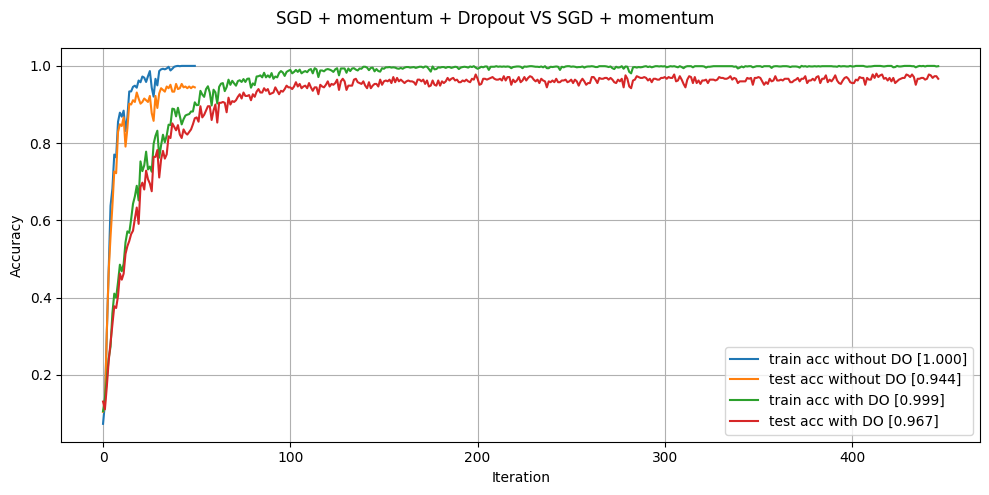

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.plot(without_do_train_acc, label=f"train acc without DO [{without_do_train_acc[-1]:.3f}]")
ax.plot(without_do_test_acc, label=f"test acc without DO [{without_do_test_acc[-1]:.3f}]")

ax.plot(with_do_train_acc, label=f"train acc with DO [{with_do_train_acc[-1]:.3f}]")
ax.plot(with_do_test_acc, label=f"test acc with DO [{with_do_test_acc[-1]:.3f}]")

fig.suptitle("SGD + momentum + Dropout VS SGD + momentum")
ax.set_xlabel("Iteration")
ax.set_ylabel("Accuracy")
ax.grid(True)
ax.legend()

fig.tight_layout()
plt.show()

**Выводы:** На большом количестве слоев маленький dropout показывает качество лучше, чем без него, но обучается кратно дольше (если до сходимости). На график видно, что где-то через 150 итераций Adam начинает колебаться в качестве асимптотически возле итогового. Dropout дает качество лучше на 15 слоях, чем рассмотренные раннее сети без Dropout на 5 слоях. Более большие размеры dropout могут сломать нейронную сеть, и она не сойдется к решению, а зачастую её качество сильно падает. Dropout повышает обобщающую способность модели благодаря занулению важных признаков, но сильное зануление может привести к большему градиенту, который испортит веса модели, и она не сойдется.

### `BatchNormalization (1 балл)`

Реализуйте слой `BatchNormalization`. Сравните обучение сети из большого числа слоёв при использовании `BatchNormalization` и без его использования. Сделайте выводы.